# TEAM SELENIUM
# Exploring the Indian Startup Ecosystem: A Data Driven Analysis of Funding Trends and Industry Sectors

## Business Understanding 
The Indian Start-up ecosystem - ranked as the third largest in the world is a network of entrepreneurs, investors and other stakeholders working to build and grow technology-driven startups in the country.
India has seen an astronomical increase in startups and funding with over 16,000 new companies added in 2020 resulting in an unprecedented growth and funding.
Funding is generally provided by investment firms, angel investors, venture capitalists and private equity firms. In the face of market uncertainties, the Indian start-up ecosystem received $8.4 billion in 2023 indicating how resilient it is.



### Project Description
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem  by analyzing funding received by start-ups from 2018 to 2021 and propose the best course of action.


### Hypothesis testing

*Hypothesis* - The amount of funds a company receive depends on the sector a company finds itself

Null hypothesis: The sector of a start up does not have an impact on the amount of funding received.

Alternative hypothesis testing: The sector of a start up does have an impact on the amount of funding received.

### Analytical questions

- Which sector has received the most funding over the time frame?

- The distribution of start ups in stages and the amount allocated each

- In which 3 locations have start ups had the most funding?

- Which year had the most investors?

- Who are the top 10 investor in the Indian start ups?

- What was the impact of Covid-19 pandemic on start-up funding in 2020 as compare to the other years?

- How is funding related to metropolitan cities and small towns? (For recommendation on government policies)

# Import Libraries and load data

In [2]:
#Importing all the necessary packages
import pyodbc #just installed with pip
#import os
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
# Import libraries



plt.style.use("fivethirtyeight")
import seaborn as sns
import math



%matplotlib inline


warnings. filterwarnings('ignore')

### Loading data from CSV

In [3]:
# read the data_2018 and convert it to pandas dataframe
df_2018 = pd.read_csv('Datasets/startup_funding2018.csv') 

In [4]:
# read the data_2019 and convert it to pandas dataframe
df_2019 = pd.read_csv('Datasets/startup_funding2019.csv') 

### Loading data from database

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [6]:
connection=pyodbc.connect(connection_string)

## Loading data from database

In [7]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
df_2020 = pd.read_sql(query1, connection)
df_2021 = pd.read_sql(query2, connection)

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company_Brand**: The name of the startup receiving funding.
- **Sector/Industy**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location/HeadQuater**: The city or region where the startup is based.
- **About**: What the company does.
- **Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Understanding the data and its characteristics is basis for an effective analysis.

## Exploratory Data Analysis : EDA

### Exploring the .head(), .tail(), .info() of the the dataframes

In [8]:
# Overview 2018 dataframe (head & tail)

df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [9]:
# Overview 2019 dataframe (head & tail)

df_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [10]:
# Overview 2020 dataframe (head & tail)

df_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [11]:
# Overview 2021 dataframe (head & tail)

df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [12]:
# Check datatypes for all datasets

In [13]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [14]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [15]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [16]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [17]:
# Checking shape of all data 2018 to 2021

print(df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape, )

(526, 6) (89, 9) (1055, 10) (1209, 9)


### Data Cleaning before Merger (The amount of each dataset will be cleaned)

### Cleaning 2018 Dataset

In [18]:
# Checking the Amount column
df_2018["Amount"]

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

In [19]:
# Cleaning the Amount column 2018

df_2018['Amount'] = df_2018['Amount'].apply(lambda x: str(x).replace('—','NaN').replace(',','').replace('$',''))
    

# Convert rupees to dollars (Exchange_rate = 0.0146 # Source: exchangerates.org.uk)
df_2018['Amount'] = df_2018['Amount'].apply(
    lambda x: float(str(x).replace('₹','')) * 0.0146 if '₹' in x
else x)

# Converting Amount column to Float

df_2018["Amount"] = df_2018["Amount"].astype(float)

# Display the modified DataFrame
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [20]:
# Checking for unique in location column 
df_2018['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [21]:
df_2018['Location'].value_counts()

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

In [22]:
# Removing states, region and country
df_2018["Location"]=df_2018['Location'].str.split(',').str[0]

In [23]:
# Confirm result
df_2018['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

### Cleaning 2019 Amount column 

In [24]:
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [25]:
# Cleaning amounts column for 2019
df_2019['Amount($)']=df_2019['Amount($)'].apply(lambda x:str(x).replace('$','').replace(',','').replace('Undisclosed','0'))
df_2019['Amount($)'] = df_2019['Amount($)'].replace('0', np.nan)

# Converting Amount column to Float
df_2019['Amount($)'] = df_2019['Amount($)'].astype(float)

# Display the modified DataFrame
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN


### Cleaning 2020 Dataset

In [26]:
df_2020['Amount'].value_counts()

Amount
1000000.0     53
2000000.0     39
3000000.0     27
5000000.0     24
500000.0      22
              ..
2879000.0      1
26500000.0     1
351000.0       1
46761000.0     1
8043000.0      1
Name: count, Length: 300, dtype: int64

In [27]:
# Checking Amount column for unique values 
df_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [28]:
# Cleaning Amount column for 2020

df_2020['Amount']=df_2020['Amount'].apply(lambda x:str(x).replace('$','').
                                                replace(',','').replace('Undisclosed','0').
                                                replace('nan','0').replace('Undislosed','0').replace('Undiclsosed','0'))
df_2020['Amount'] = df_2020['Amount'].replace('0', np.nan)

# Display the modified DataFrame
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [29]:
# Covert datatype to float
df_2020["Amount"] = df_2020["Amount"].astype(float)
df_2020["Amount"].head()

0    200000.0
1    100000.0
2         NaN
3    400000.0
4    340000.0
Name: Amount, dtype: float64

### Cleaning 2021 Dataset

### Correction of columns with wrong entries

In [30]:
df_2021.loc[[98, 241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


### Important notice for corrections
Theses errors were noticed in the Data Understanding phase

##### Label 98, 111 (FanPlay)
No Location

Amount 1200000 was recorded under Stage

Investor(Upstarks) was recorded under Amount

##### Label 241, 255 (MasterChow)
Sector(Food & Beverages) was recorded under Location

Location (Hauz Khas) was recorded under Sector 

##### Label 242, 256 (Fullife Healthcare)
Amount of 22000000 was recorded under Investor

Investor (Morgan Stanley, Private Equity Asia) was recorded under Founder

Stage(Series C) was recorded under Amount

Sector (Pharmaceuticals) was recorded under Location

There was no location recorded

##### Label 1100
Sector - Online Media

##### Label 1176(Peak)
Location  -  Manchester

Sector  - Information Technology

In [31]:


# LABEL 98, 111(FanPlay)
df_2021.loc[(98, 111), "Amount"] = "$1200000"
df_2021.loc[(98, 111), "Stage"] = "Undisclosed"
df_2021.loc[(98, 111), "Investor"] = "Upsparks"
df_2021.loc[(98, 111), "HeadQuarter"] = "Undisclosed"

# LABEL 241, 255(MasterChow)
df_2021.loc[(241, 255), "HeadQuarter"] = "Hauz Khas"
df_2021.loc[(241, 255), "Sector"] = "Food & Beverages"

# LABEL 257(MoEVing)
df_2021.loc[257, "Amount"] = "$5000000"
df_2021.loc[257, "HeadQuarter"] = "Gurugram"
df_2021.loc[257, "Sector"] = "Electronic Vehicle"
df_2021.loc[257, "Stage"] = "Seed"
df_2021.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

# LABEL 242, 256(Fullife Healthcare)
df_2021.loc[(242, 256), "Amount"] = "$22000000"
df_2021.loc[(242, 256), "Investor"] = "Morgan Stanley Private Equity Asia"
df_2021.loc[(242, 256), "Stage"] = "Series C"
df_2021.loc[(242, 256), "HeadQuarter"] = "Mumbai"
df_2021.loc[(242, 256), "Sector"] = "Pharmaceuticals"
df_2021.loc[(242, 256), "Founders"] = "Varun Khanna"
df_2021.loc[(242, 256), "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

# LABEL 538 (Little Leap)
df_2021.loc[538, "Amount"] = "$300000"
df_2021.loc[538, "Investor"] = "ah! Ventures"
df_2021.loc[538, "Stage"] = "Undisclosed"
df_2021.loc[538, "Founders"] = "Vishal Gupta"

# LABEL 545 (AdmitKard)
df_2021.loc[545, "Amount"] = "$1000000"
df_2021.loc[545, "Investor"] = "Unknown"
df_2021.loc[545, "Stage"] = "Pre-series A"
df_2021.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

# LABEL 551 (BHyve)
df_2021.loc[551, "Amount"] = "$300000"
df_2021.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
df_2021.loc[551, "Stage"] = "Undisclosed"
df_2021.loc[551, "Sector"] = "HR"

# LABEL 674 (MYRE Capital)
df_2021.loc[674, "Amount"] = "$6000000"
df_2021.loc[674, "Stage"] = "Undisclosed"

# LABEL 677 (Saarthi Pedagogy)
df_2021.loc[677, "Amount"] = "$1000000"
df_2021.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
df_2021.loc[677, "Stage"] = "Undisclosed"

# LABEL 1100(Sochcast)
df_2021.loc[1100, "Investor"] = "Undisclosed"
df_2021.loc[1100, "HeadQuarter"] = "Undisclosed"
df_2021.loc[1100, "Sector"] = "Online Media"

# LABEL 1148 (Godamwale)
df_2021.loc[1148, "Amount"] = "1000000"
df_2021.loc[1148, "Investor"] = "Undisclosed"
df_2021.loc[1148, "Stage"] = "Seed"

# LABEL 1176(Peak)
df_2021.loc[1176, "Sector"] = "Information Technology & Services"
df_2021.loc[1176, "HeadQuarter"] = "Manchester"

### Cleaning Amount column

In [32]:
df_2021['Amount'].value_counts()

Amount
$Undisclosed    73
$1000000        54
Undisclosed     43
$2000000        40
$1,000,000      33
                ..
$5,200,000       1
$1,400,000       1
$900,000         1
$250,000         1
$55000000        1
Name: count, Length: 272, dtype: int64

In [33]:
# Cleaning amounts column for 2021

df_2021['Amount']=df_2021['Amount'].apply(lambda x:str(x).replace('$','').
                                                replace(',' , '0').replace('Undisclosed','0').
                                                replace('None','0').replace('$Undisclosed','0').replace('Upsparks','0').replace('Series C','0').replace('Seed','0').
                                                replace('$undisclosed', '0').
                                                replace('ah! Ventures','0').
                                                replace('Pre-series A','0').
                                                replace('JITO Angel Network LetsVenture','0').
                                                replace('ITO Angel Network LetsVenture','0').replace('undisclosed','0').
                                                replace('ITO Angel Network0 LetsVenture', '0').replace('nan', '0').replace('J0', '0')
                                                )

In [34]:
# Replace '0' with np.nan cont convert amount to float
df_2021['Amount'] = df_2021['Amount'].replace('0', np.nan) 

df_2021['Amount'] = pd.to_numeric(df_2021['Amount'], downcast='float') # Convert Amount($) column from String to Float 

# Display the modified DataFrame
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1.020000e+08,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",1.200000e+10,None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",3.000000e+09,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",5.100000e+09,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2.000000e+08,Seed


In [35]:
# Describing the numberical columns 2021 data
df_2021.describe()

,Founded,Amount
count,1208.000000,1.067000e+03
mean,2016.655629,1.423543e+11
std,4.517364,4.592125e+12
min,1963.000000,1.000000e+05
25%,2015.000000,1.900000e+06
50%,2018.000000,7.000000e+06
75%,2020.000000,1.050000e+08
max,2021.000000,1.500000e+14


In [36]:
# Prepparing to merge the datasets

In [37]:
# Add missing coulmns in 2018 data

# Creating new columns
Founded = (np.nan)
df_2018['Founded'] = Founded
Founders = (np.nan)
df_2018['Founders'] = Founders
Investor = (np.nan)
df_2018['Investor'] = Investor

# Changed columns from float to string
df_2018['Founders']=df_2018['Founders'].astype(str)
df_2018['Investor']=df_2018['Investor'].astype(str)

In [38]:
# Rename Columns of the 2018 data to match the column names of the other data

df_2018 = df_2018.rename(columns = 
                         {'Company Name':'Company_Brand', 'Industry':'Sector', 'Location':'HeadQuarter', 
                          'Round/Series':'Stage', 'About Company':'What_it_does'}
                        )

In [39]:
# Rename Columns of the 2019 data to match the column names of the other data

df_2019 = df_2019.rename(columns = 
                         {'Company/Brand':'Company_Brand', 
                          'Amount($)':'Amount', 'What it does':'What_it_does'}
                        )

In [40]:
# Create Year column for all datasets 

df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021

In [41]:
# Check all columns to confirm changes
df_2018.columns, df_2019.columns, df_2020.columns, df_2021.columns

(Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
        'What_it_does', 'Founded', 'Founders', 'Investor', 'Year'],
       dtype='object'),
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
        'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
       dtype='object'),
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
        'Founders', 'Investor', 'Amount', 'Stage', 'column10', 'Year'],
       dtype='object'),
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
        'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
       dtype='object'))

In [42]:
# Concatenate all 4 dataset (2018-2021)
master_df = pd.concat([df_2018, df_2019, df_2020, df_2021])
master_df.reset_index(drop=True, inplace=True)
master_df

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor,Year,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,nan,nan,2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,nan,nan,2018,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,nan,nan,2018,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,nan,nan,2018,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,nan,nan,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,NaN
2875,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,NaN
2876,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,NaN
2877,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,NaN


In [43]:
# Drop Unamed Column which belonged to the 2020 data after cleaning

master_df.drop(['column10'], axis=1, inplace = True)

In [44]:
# Checking basic info
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1946 non-null   object 
 3   Amount         2323 non-null   float64
 4   HeadQuarter    2765 non-null   object 
 5   What_it_does   2879 non-null   object 
 6   Founded        2110 non-null   float64
 7   Founders       2860 non-null   object 
 8   Investor       2779 non-null   object 
 9   Year           2879 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 225.0+ KB


In [45]:
# Checking for the count of NaN values

master_df.isna().sum()

Company_Brand      0
Sector            18
Stage            933
Amount           556
HeadQuarter      114
What_it_does       0
Founded          769
Founders          19
Investor         100
Year               0
dtype: int64

In [46]:
# Check for duplicates after merging
master_df.duplicated().sum()

23

In [47]:
# Detailed look at duplicates
master_df[master_df.duplicated()]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor,Year
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,nan,nan,2018
760,Krimanshi,Biotechnology company,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,2015.0,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",2020
820,Nykaa,Cosmetics,None,NaN,Mumbai,Nykaa is an online marketplace for different b...,2012.0,Falguni Nayar,"Alia Bhatt, Katrina Kaif",2020
977,Byju’s,EdTech,None,500000000.0,Bangalore,An Indian educational technology and online tu...,2011.0,Byju Raveendran,"Owl Ventures, Tiger Global Management",2020
1777,Curefoods,Food & Beverages,None,13000000.0,Bangalore,Healthy & nutritious foods and cold pressed ju...,2020.0,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",2021
1779,Bewakoof,Apparel & Fashion,None,8000000.0,Mumbai,Bewakoof is a lifestyle fashion brand that mak...,2012.0,Prabhkiran Singh,InvestCorp,2021
1781,FanPlay,Computer Games,Undisclosed,1200000.0,Undisclosed,A real money game app specializing in trivia g...,2020.0,YC W21,Upsparks,2021
1787,Advantage Club,HRTech,None,1700000.0,Mumbai,Advantage Club is India's largest employee eng...,2014.0,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",2021
1789,Ruptok,FinTech,None,1000000.0,New Delhi,Ruptok fintech Pvt. Ltd. is an online gold loa...,2020.0,Ankur Gupta,Eclear Leasing,2021
1913,Trinkerr,Capital Markets,Series A,6600000.0,Bangalore,Trinkerr is India's first social trading platf...,2021.0,"Manvendra Singh, Gaurav Agarwal",Accel India,2021


In [48]:
# Descriptve statistics of master_df
master_df.describe()

,Amount,Founded,Year
count,2.323000e+03,2110.000000,2879.000000
mean,6.542942e+10,2016.079621,2020.023619
std,3.112247e+12,4.368006,1.086974
min,8.760000e+02,1963.000000,2018.000000
25%,1.000000e+06,2015.000000,2020.000000
50%,4.000000e+06,2017.000000,2020.000000
75%,2.800000e+07,2019.000000,2021.000000
max,1.500000e+14,2021.000000,2021.000000


### Further Cleaning of Key columns 

In [49]:
# Dealing with duplicates
# Duplicates will be dropped
master_df = master_df.drop_duplicates()

In [50]:
# Confirm changes 
master_df.duplicated().any()

False

### Stage

In [51]:
# Checking unique
master_df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [52]:
# Clean the Stage column categorize them

modified_stage = {
    'Seed': 'Seed funding',
    'Angel': 'Seed funding',
    'Venture - Series Unknown': 'Series A',
    'Debt Financing': 'Series A',
    'Grant': 'Seed funding',
    'Pre-Seed': 'Pre-Seed funding',
    'Funding Round': 'Pre-Seed funding',
    'Fresh funding': 'Pre-Seed funding',
    'Pre series A': 'Series A',
    'Post series A': 'Series A',
    'Seed fund': 'Seed funding',
    'Series B+': 'Series B',
    'Seed round': 'Seed funding',
    'Pre-seed' : 'Pre-Seed funding',
    'Seed A': 'Seed funding',
    'Pre-series A' : 'Series A',
    'Pre-series' : 'Pre-Seed funding',
    'Pre-series C' : 'Series C', 
    'Pre-series B' : 'Series B',
    'Pre- series A' : 'Series A',
    'Pre-Series B' : 'Series B',
    'Series A-1' : 'Series A', 
    'Seies A': 'Series A',
    'Seed Funding' : 'Seed funding', 
    'Pre-Seed' : 'Pre-Seed funding', 
    'Seed round': 'Seed funding' ,
    'Pre-seed Round': 'Pre-Seed funding', 
    'Pre Series A' : 'Series A',
    'Pre seed Round': 'Pre-Seed funding', 
    'Angel Round' :  'Seed funding', 
    'Pre series A1': 'Series A',
    'Pre series A' : 'Series A', 
    'Seed Round' : 'Seed funding',
    'Pre seed round' : 'Pre-Seed funding',
    'Pre series B' : 'Series B', 
    'Pre series C' : 'Series B', 
    'Seed Investment': 'Seed funding',
    'Seed+' : 'Seed funding',
    'Series A+' : 'Series A',
    'PE' : 'Private Equity',
    'Pre-series A1' : 'Series A', 
    '$300000' : 'None', 
    'Early seed' : 'Pre-Seed funding',
    '$6000000' : 'None',
    '$1000000' : 'None',
    'Series B2' : 'Series B',
    'Series E2' : 'Series E', 
    'Series D1' : 'Series D',
    'Series B3' : 'Series B',
    'Series F1' : 'Series F',
    'Series A2' : 'Series A',
    '$1200000': 'None',
    'Series F2':'Series F',
    'Series C, D': 'Series C',
    'Bridge Round': 'Bridge'
    
}

In [53]:
# Replace with the modified stages

master_df.replace({'Stage': modified_stage}, inplace=True)

In [54]:
# Confirm changes
master_df['Stage'].unique()

array(['Seed funding', 'Series A', 'Series B', 'Pre-Seed funding',
       'Private Equity', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', nan, 'Series G', 'Series F', None, 'Debt',
       'Bridge', 'Edge', 'Seed Round & Series A', 'Mid series',
       'Series I'], dtype=object)

In [55]:
# Replace the web address with NaN
master_df['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 
                         np.NaN, inplace=True)

In [56]:
# Confirm changes
master_df['Stage'].value_counts()

Stage
Seed funding             734
Series A                 648
Series B                 157
Series C                 117
Pre-Seed funding          79
Series D                  52
Debt                      45
Series E                  30
Series F                  13
Private Equity            11
Bridge                     9
Corporate Round            8
Undisclosed                7
Series H                   4
Secondary Market           3
Post-IPO Equity            3
Series G                   3
Post-IPO Debt              2
Seed Round & Series A      1
Mid series                 1
Non-equity Assistance      1
Edge                       1
Series I                   1
Name: count, dtype: int64

To enable deep-level analysis, the data will be further processed by categorizing the `stages column` into high-level funding stages based on the stages listed on the Indian Startup Ecosystem website. A new variable, `new_modified_stage`, will be created to facilitate the groupings.


SOURCE: https://www.startupindia.gov.in/



| Stage of Funding          | Stage mapping                                                                                                                                                               |
|-----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Ideation        | Pre-Seed funding                                                                                                                                                       |
| Validation      | Mid series, Seed Round & Series A, Seed funding                                                                                                                       |
| Early Traction  | Series A                                                                                                                                                               |
| Scaling         | Series B, Series C, Series D, Series E, Series F, Series G, Series H, Series I                                                                                          |
| Exit Option     | Post-IPO Debt, Post-IPO Equity, Secondary Market                                                                                                                       |
| Other           | Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, Edge                                       

In [57]:

new_modified_stage = {
    'Pre-Seed funding': 'Ideation',
    'Mid series' : 'Validation', 
    'Seed Round & Series A': 'Validation', 
    'Seed funding': 'Validation',
    'Series A':'Early Traction', 
    'Series B': 'Scaling', 
    'Series C': 'Scaling', 
    'Series D': 'Scaling', 
    'Series E': 'Scaling', 
    'Series F': 'Scaling', 
    'Series G': 'Scaling', 
    'Series H': 'Scaling', 
    'Series I': 'Scaling',
    'Post-IPO Debt':'Exit Option' , 
    'Post-IPO Equity': 'Exit Option', 
    'Secondary Market': 'Exit Option',
    'Private Equity': 'Other', 
    'Corporate Round': 'Other', 
    'Undisclosed' : 'Other', 
    'Non-equity Assistance': 'Other', 
    'Debt': 'Other', 
    'Bridge': 'Other', 
    'Edge': 'Other'



}

In [58]:
# Replace with the new_modified_stage

master_df.replace({'Stage': new_modified_stage}, inplace=True)

In [59]:
# Confirm changes
master_df['Stage'].value_counts()

Stage
Validation        736
Early Traction    648
Scaling           377
Other              82
Ideation           79
Exit Option         8
Name: count, dtype: int64

In [60]:
master_df['Stage'].isnull().sum()

926

Stage
Validation        736
Early Traction    648
Scaling           377
Other              82
Ideation           79
Exit Option         8
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Stages of Start-up Funding')

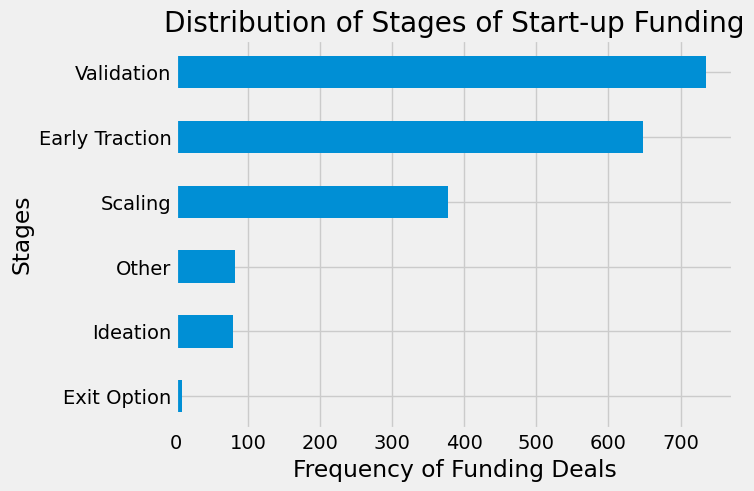

In [61]:
# Ploting bar grapgh for stage 
unique_stages = (master_df.loc[:,'Stage']).value_counts()
print(unique_stages)

unique_stages.head(10).sort_values().plot.barh()

plt.xlabel("Frequency of Funding Deals")
plt.ylabel("Stages")
plt.title("Distribution of Stages of Start-up Funding")

### Cleaning the HeadQuarter column

In [62]:
# Checking for unique 
master_df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli, Tamilnadu', None, 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'S

In [63]:
# Modified location mapping
modified_location ={
    'Bengaluru': 'Bangalore',
    'Delhi': 'New Delhi',
    'Bangalore City' : 'Bangalore',
    #'Gurgaon' : 'Gurugram',
    'Haryana': 'Chandigarh',
    'Uttar Pradesh' : 'Noida',
    'Uttar pradesh' : 'Noida',
    'Tamil Nadu': 'Chennai',
    'Faridabad, Haryana': 'Faridabad',
    'Computer Games': 'Undisclosed',
    'Telangana': 'Hyderabad',  # 2019
    'Dhingsara, Haryana': 'Chandigarh',
    'The nilgiris': 'Chennai',
    'Santra': 'Bhopal',
    'India': 'New delhi',
    'Gurugram\\t#ref!': 'Gurgaon',
    '"Gurugram\t#ref!"': 'Gurgaon',
    'Banglore': 'Bangalore',
    'Singapore': 'Overseas',
    'Frisco, Texas, United States': 'Overseas',
    'California': 'Overseas',
    'New York, United States': 'Overseas',
    'San Francisco, California, United States': 'Overseas',
    'San Francisco, United States': 'Overseas',
    'San Ramon, California': 'Overseas',
    'Paris, Ile-de-France, France': 'Overseas',
    'Plano, Texas, United States': 'Overseas',
    'Sydney': 'Overseas',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'Overseas',
    'Bangaldesh': 'Overseas',
    'London, England, United Kingdom': 'Overseas',
    'Sydney, New South Wales, Australia': 'Overseas',
    'Milano, Lombardia, Italy': 'Overseas',
    'Palmwoods, Queensland, Australia': 'Overseas',
    'France': 'Overseas',
    'San Francisco Bay Area, West Coast, Western US': 'Overseas',
    'Tangerang, Jawa Barat, Indonesia': 'Overseas',
    'Berlin': 'Overseas',
    'Seattle': 'Overseas',
    'Riyadh': 'Overseas',
    'Seoul': 'Overseas',
    'New York': 'Overseas',
    'Bangkok': 'Overseas',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Overseas',
    'Shanghai, China': 'Overseas',
    'Jiaxing, Zhejiang, China': 'Overseas',
    'Irvine, California, United States': 'Overseas',
    'San Franciscao' : 'Overseas',
    'San Francisco': 'Overseas',
    'Jaipur, Rajastan': 'Jaipur',
    'Rajastan': "Jaipur",
    'Tumkur, Karnataka': 'Tumkur',
    'Samastipur, Bihar': 'Samastipur',
    #'None' : 'Undisclosed',
    'Tumkur, Karnataka' : 'Tumkur',
    'Tirunelveli, Tamilnadu': 'Tirunelveli',
    'Trivandrum, Kerala, India': 'Trivandrum',
    'Manchester': 'Overseas',
    'Mountain View, CA' : 'Overseas',
    'London' : 'Overseas',
    'Information Technology & Services': 'Undisclosed',
    'The Nilgiris' :'Chennai',
    'Beijing' : 'Overseas',
    'Small Towns, Andhra Pradesh': 'Amaravati',
    'Goa' : 'Panaji',
    'West Bengal' : 'Kolkata',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Jharkhand': 'Ranchi',
    'Thiruvananthapuram': 'Trivandrum'
   
  

}

In [64]:
# Replace with the modified location

master_df.replace({'HeadQuarter': modified_location}, inplace=True)

In [65]:
# Confirm changes 
master_df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'New delhi', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Chandigarh',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Guindy', 'Lucknow', nan, 'Gurugram', 'Surat',
       'Rajasthan', 'Tirunelveli', None, 'Overseas', 'Gujarat', 'Kerala',
       'Patna', 'Samastipur', 'Tumkur', 'Ludhiana', 'Dehradun',
       'Warangal', 'Hyderebad', 'Odisha', 'Bihar', 'Panaji', 'Ahmadabad',
       'Amaravati', 'Rajsamand', 'Ranchi', 'Undisclosed', 'Vadodara',
       'Hauz Khas', 'Nagpur', 'Samsitpur', 'Silvassa', 'Roorkee',
       'Ambernath', 'Panchkula', 'Mangalore', 'Telangana', 'Bhubaneswar',
  

In [76]:
master_df[pd.isnull(master_df["HeadQuarter"])]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor,Year
526,Bombay Shaving,E-Commerce,NaN,6300000.0,NaN,Provides a range of male grooming products,NaN,Shantanu Deshpande,Sixth Sense Ventures,2019
534,Quantiphi,Technology,Early Traction,20000000.0,NaN,It is an AI and big data services company prov...,NaN,Renuka Ramnath,Multiples Alternate Asset Management,2019
540,Open Secret,Food & Beverage,NaN,NaN,NaN,It produces and sells top quality snacks,NaN,"Ahana Gautam, Udit Kejriwal",Matrix Partners,2019
542,Byju's,Education,NaN,540000000.0,NaN,Provides online learning classes,2011.0,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",2019
544,Witblox,Education,NaN,182700.0,NaN,Offers a range of robotics learning tools,2014.0,Amit Modi,Mumbai Angels Network,2019
...,...,...,...,...,...,...,...,...,...,...
1656,Shiksha,Education,None,181000.0,None,It makes college selection easy for students l...,2008.0,Kanav Sachdeva,Mumbai Angels Network,2020
1660,XpressBees,Logistics,None,10000000.0,None,Provides end to end supply chain solutions,2015.0,"Supam Maheshwari, Amitava Saha",Alibaba,2020
1662,Wealth Bucket,Financial Services,None,3000000.0,None,An online platform for mutual fund investments,2018.0,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal",2020
1666,EpiFi,Financial Services,Validation,13200000.0,None,It offers customers with a single interface fo...,NaN,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",2020


HeadQuarter
Bangalore      922
Mumbai         469
New Delhi      318
Gurugram       239
Chennai        108
              ... 
Samastipur       1
Tumkur           1
Ludhiana         1
Dehradun         1
Gandhinagar      1
Name: count, Length: 83, dtype: int64


Text(0.5, 1.0, 'Top 10 Start-up Funding by HeadQuarters')

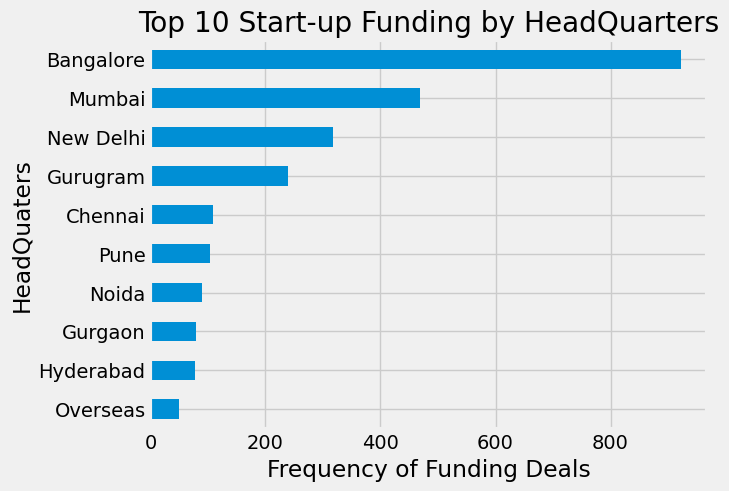

In [66]:
# Ploting bar grapgh for HeadQuarter 
unique_headquarters = (master_df.loc[:,'HeadQuarter']).value_counts()
print(unique_headquarters)

unique_headquarters.head(10).sort_values().plot.barh()

plt.xlabel("Frequency of Funding Deals")
plt.ylabel("HeadQuaters")
plt.title("Top 10 Start-up Funding by HeadQuarters")

### Scctor 

In [67]:
# Description of Sector

master_df['Sector'].describe()

count        2838
unique        870
top       FinTech
freq          172
Name: Sector, dtype: object

In [68]:
master_df['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [69]:
# We want to simplify the industry column
# Split values with a comma delimiter, select only the first element from the resulting list of substrings
# remove single quotes, since it is a string

master_df['Sector'] = master_df['Sector'].str.split(',').str[0].str.replace("'", "", regex=True)

master_df['Sector'].sort_values()

139     3D Printing
1143             AI
1359             AI
1633             AI
563              AI
           ...     
1424           None
1533           None
1541           None
1627           None
1646           None
Name: Sector, Length: 2856, dtype: object

In [70]:
master_df['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [71]:
# mapping sectors to their standardize versions
modified_sector = {
    'Brand Marketing': 'Marketing & Advertising',
    'Agriculture': 'Agriculture',
    'Credit': 'Financial Services',
    'Financial Services': 'Financial Services',
    'E-Commerce Platforms': 'E-Commerce',
    'Cloud Infrastructure': 'Cloud Computing',
    'Internet': 'Internet',
    'Market Research': 'Market Research',
    'Information Services': 'Information Technology',
    'Mobile Payments': 'Financial Services',
    'B2B': 'Business Services',
    'Apps': 'Technology',
    'Food Delivery': 'Food & Beverage',
    'Industrial Automation': 'Industrial',
    'Automotive': 'Automotive',
    'Finance': 'Financial Services',
    'Accounting': 'Financial Services',
    'Artificial Intelligence': 'Artificial Intelligence',
    'Internet of Things': 'Internet of Things',
    'Air Transportation': 'Transportation',
    'Food and Beverage': 'Food & Beverage',
    'Autonomous Vehicles': 'Automotive',
    'Enterprise Software': 'Enterprise Software',
    'Logistics': 'Logistics',
    'Insurance': 'Insurance',
    'Information Technology': 'Information Technology',
    'Blockchain': 'Blockchain',
    'Education': 'Education',
    'E-Commerce': 'E-Commerce',
    'Renewable Energy': 'Energy',
    'E-Learning': 'Education',
    'Clean Energy': 'Energy',
    'Transportation': 'Transportation',
    'Fitness': 'Health & Wellness',
    'Hospitality': 'Hospitality',
    'Media and Entertainment': 'Media & Entertainment',
    'Broadcasting': 'Media & Entertainment',
    'EdTech': 'Education',
    'Health Care': 'Health Care',
    'Sports': 'Sports',
    'Big Data': 'Technology',
    'Cloud Computing': 'Cloud Computing',
    'Food Processing': 'Food & Beverage',
    'Trading Platform': 'Financial Services',
    'Consumer Goods': 'Consumer Goods',
    'Wellness': 'Health & Wellness',
    'Fashion': 'Fashion',
    'Consulting': 'Consulting',
    'Biotechnology': 'Biotechnology',
    'Communities': 'Community',
    'Consumer': 'Consumer Goods',
    'Consumer Applications': 'Consumer Goods',
    'Mobile': 'Mobile Technology',
    'Advertising': 'Marketing & Advertising',
    'Marketplace': 'E-Commerce',
    'Aerospace': 'Aerospace',
    'Home Decor': 'Home Decor',
    'Energy': 'Energy',
    'Digital Marketing': 'Marketing & Advertising',
    'Creative Agency': 'Marketing & Advertising',
    'Consumer Lending': 'Financial Services',
    'Health Diagnostics': 'Health Care',
    'Banking': 'Financial Services',
    'Embedded Systems': 'Technology',
    'Beauty': 'Beauty & Wellness',
    'AgTech': 'Agriculture',
    'Credit Cards': 'Financial Services',
    'Software': 'Technology',
    'Manufacturing': 'Manufacturing',
    'Hospital': 'Health Care',
    'Events': 'Events',
    '3D Printing': 'Manufacturing',
    'Digital Entertainment': 'Media & Entertainment',
    'Funding Platform': 'Financial Services',
    'Classifieds': 'E-Commerce',
    'Enterprise Resource Planning (ERP)': 'Enterprise Software',
    'Audio': 'Media & Entertainment',
    'Government': 'Government',
    'Digital Media': 'Media & Entertainment',
    'Business Intelligence': 'Technology',
    'Children': 'Children',
    'Rental': 'Rental',
    'Travel': 'Travel',
    'Wealth Management': 'Financial Services',
    'Veterinary': 'Health Care',
    'Tourism': 'Travel',
    'Consumer Electronics': 'Consumer Goods',
    'Analytics': 'Technology',
    'Facilities Support Services': 'Services',
    'Medical': 'Health Care',
    'Music Streaming': 'Media & Entertainment',
    'Retail': 'Retail',
    'Business Development': 'Business Services',
    'Human Resources': 'Human Resources',
    'Customer Service': 'Customer Service',
    'Training': 'Education',
    'Dietary Supplements': 'Health & Wellness',
    'Collaboration': 'Technology',
    'Nanotechnology': 'Technology',
    'File Sharing': 'Technology',
    'Crowdfunding': 'Financial Services',
    'Catering': 'Food & Beverage',
    'Computer': 'Technology',
    'Android': 'Technology',
    'Delivery': 'Logistics',
    'Environmental Consulting': 'Consulting',
    'Commercial Real Estate': 'Real Estate',
    'Delivery Service': 'Logistics',
    'Basketball': 'Sports',
    'Fraud Detection': 'Security',
    'Cryptocurrency': 'Financial Services',
    'Wedding': 'Events',
    'Crowdsourcing': 'Crowdsourcing',
    'Farming': 'Agriculture',
    'Business Travel': 'Travel',
    'Career Planning': 'Human Resources',
    'Medical Device': 'Health Care',
    'Alternative Medicine': 'Health Care',
    'Dental': 'Health Care',
    'CleanTech': 'Energy',
    'Marketing': 'Marketing & Advertising',
    'Commercial': 'Business Services',
    'Continuing Education': 'Education',
    'Smart Cities': 'Technology',
    'Social Media': 'Social Media',
    'Biopharma': 'Biotechnology',
    'Child Care': 'Children',
    'Health Insurance': 'Insurance',
    'Gaming': 'Gaming',
    'Search Engine': 'Technology',
    'Battery': 'Technology',
    'Cosmetics': 'Beauty & Wellness',
    'eSports': 'Gaming',
    'Reading Apps': 'Technology',
    'Electric Vehicle': 'Automotive',
    'Packaging Services': 'Manufacturing',
    'Last Mile Transportation': 'Transportation',
    'Cooking': 'Food & Beverage',
    'FinTech': 'Financial Services',
    'Online Games': 'Gaming',
    'Online Portals': 'Technology',
    'Music': 'Media & Entertainment',
    'News': 'Media & Entertainment',
    'Industrial': 'Industrial',
    'Dating': 'Social',
    'Fantasy Sports': 'Gaming',
    'Eyewear': 'Fashion',
    'Ecommerce': 'E-Commerce',
    'Edtech': 'Education',
    'Interior design': 'Home Decor',
    'AgriTech': 'Agriculture',
    'Technology': 'Technology',
    'SaaS': 'Technology',
    'AI & Tech': 'Technology',
    'E-commerce': 'E-Commerce',
    'E-commerce & AR': 'E-Commerce',
    'Fintech': 'Financial Services',
    'HR tech': 'Human Resources',
    'Food tech': 'Food & Beverage',
    'Health': 'Health & Wellness',
    'Healthcare': 'Health Care',
    'Safety tech': 'Security',
    'Pharmaceutical': 'Health Care',
    'Insurance technology': 'Insurance',
    'AI': 'Technology',
    'Foodtech': 'Food & Beverage',
    'Food': 'Food & Beverage',
    'IoT': 'Internet of Things',
    'E-marketplace': 'E-Commerce',
    'Robotics & AI': 'Technology',
    'Food & Nutrition': 'Food & Beverage',
    'E-Sports': 'Gaming',
    'Jewellery': 'Fashion',
    'B2B Supply Chain': 'Business Services',
    'Games': 'Gaming',
    'Food & tech': 'Food & Beverage',
    'Accomodation': 'Hospitality',
    'Automotive tech': 'Automotive',
    'Legal tech': 'Legal',
    'Mutual Funds': 'Financial Services',
    'Cybersecurity': 'Security',
    'Automobile': 'Automotive',
    'Healthtech': 'Health Care',
    'Yoga & wellness': 'Health & Wellness',
    'Virtual Banking': 'Financial Services',
    'Transport & Rentals': 'Transportation',
    'Marketing & Customer loyalty': 'Marketing & Advertising',
    'Infratech': 'Technology',
    'Automobile & Technology': 'Automotive',
    'Hygiene management': 'Health & Wellness',
    'Escrow': 'Financial Services',
    'Networking platform': 'Technology',
    'Food & Bevarages': 'Food & Beverage',
    'HealthTech': 'Health Care',
    'Fashion startup': 'Fashion',
    'Food Industry': 'Food & Beverage',
    'Virtual auditing startup': 'Technology',
    'Work fulfillment': 'Human Resources',
    'AI startup': 'Technology',
    'Telecommunication': 'Telecommunications',
    'Tech Startup': 'Technology',
    'Medtech': 'Health Care',
    'Tyre management': 'Automotive',
    'Cloud company': 'Cloud Computing',
    'Software company': 'Technology',
    'Venture capitalist': 'Financial Services',
    'Renewable player': 'Energy',
    'IoT startup': 'Internet of Things',
    'SaaS startup': 'Technology',
    'Aero company': 'Aerospace',
    'Marketing company': 'Marketing & Advertising',
    'Retail startup': 'Retail',
    'Co-working Startup': 'Business Services',
    'Finance company': 'Financial Services',
    'Tech company': 'Technology',
    'Solar Monitoring Company': 'Energy',
    'Video sharing platform': 'Media & Entertainment',
    'Gaming startup': 'Gaming',
    'Video streaming platform': 'Media & Entertainment',
    'Consumer appliances': 'Consumer Goods',
    'Blockchain startup': 'Blockchain',
    'Conversational AI platform': 'Artificial Intelligence',
    'Real Estate': 'Real Estate',
    'SaaS platform': 'Technology',
    'AI platform': 'Technology',
    'Fusion beverages': 'Food & Beverage',
    'HR Tech': 'Human Resources',
    'Job portal': 'Technology',
    'Dairy startup': 'Food & Beverage',
    'Content management': 'Content',
    'Spacetech': 'Technology',
    'Trading platform': 'Financial Services',
    'AI Company': 'Technology',
    'Photonics startup': 'Technology',
    'Entertainment': 'Media & Entertainment',
    'Scanning app': 'Technology',
    'Skincare startup': 'Beauty & Wellness',
    'Food and Beverages': 'Food & Beverage',
    'Biotechnology company': 'Biotechnology',
    'FoodTech': 'Food & Beverage',
    'Proptech': 'Real Estate',
    'Fitness startup': 'Health & Wellness',
    'PaaS startup': 'Technology',
    'Beverages': 'Food & Beverage',
    'Automobiles': 'Automotive',
    'Deeptech': 'Technology',
    'EV startup': 'Automotive',
    'AR/VR startup': 'Technology',
    'Recruitment startup': 'Human Resources',
    'QSR startup': 'Food & Beverage',
    'Video platform': 'Media & Entertainment',
    'Fertility tech': 'Health Care',
    'Luxury car startup': 'Automotive',
    'FM': 'Radio',
    'Nutrition sector': 'Food & Beverage',
    'Tech platform': 'Technology',
    'Video': 'Media & Entertainment',
    'Retail Tech': 'Retail',
    'HeathTech': 'Health & Wellness',
    'Sles and marketing': 'Marketing & Advertising',
    'LegalTech': 'Legal',
    'Car Service': 'Automotive',
    'Bike marketplace': 'Transportation',
    'Agri tech': 'Agriculture',
    'Reatil startup': 'Retail',
    'AR platform': 'Technology',
    'Content marketplace': 'Content',
    'Interior Design': 'Home Decor',
    'Rental space': 'Rental',
    'Soil-Tech': 'Agriculture',
    'Ayurveda tech': 'Health & Wellness',
    'Packaging solution startup': 'Manufacturing',
    'Cleantech': 'Energy',
    'Sanitation solutions': 'Health & Wellness',
    'HealthCare': 'Health Care',
    'Home Design': 'Home Decor',
    'InsureTech': 'Insurance',
    'AI Startup': 'Technology',
    'Solar solution': 'Energy',
    'Jewellery startup': 'Fashion',
    'Multinational conglomerate company': 'Conglomerate',
    'Deeptech startup': 'Technology',
    'Social Network': 'Social Media',
    'Publication': 'Media & Entertainment',
    'Tech': 'Technology',
    'Venture capital': 'Financial Services',
    'Entreprenurship': 'Entrepreneurship',
    'Food devlivery': 'Food & Beverage',
    'Warehouse': 'Logistics',
    'Online financial service': 'Financial Services',
    'Eyeglasses': 'Fashion',
    'Battery design': 'Technology',
    'Online credit management startup': 'Financial Services',
    'Beverage': 'Food & Beverage',
    'TravelTech': 'Travel',
    'Startup laboratory': 'Technology',
    'Personal care startup': 'Beauty & Wellness',
    'Customer service company': 'Customer Service',
    'SaaS\xa0\xa0startup': 'Technology',
    'Marketing startup': 'Marketing & Advertising',
    'Service industry': 'Services',
    'Social media': 'Social Media',
    'AR startup': 'Technology',
    'HR Tech startup': 'Human Resources',
    'Automotive Startup': 'Automotive',
    'Food Startup': 'Food & Beverage',
    'EdTech Startup': 'Education',
    'Car Trade': 'Automotive',
    'EdtTech': 'Education',
    'AI Platform': 'Technology',
    'Automation': 'Technology',
    'Solar SaaS': 'Energy',
    'WL & RAC protection': 'Insurance',
    'Social commerce': 'E-Commerce',
    'Home interior services': 'Home Decor',
    'Agritech startup': 'Agriculture',
    'API platform': 'Technology',
    'Deep Tech': 'Technology',
    'Electricity': 'Energy',
    'Automotive company': 'Automotive',
    'FMCG': 'Consumer Goods',
    'Insurance Tech': 'Insurance',
    'Video personalization': 'Media & Entertainment',
    'Software Company': 'Technology',
    'Biomaterial startup': 'Biotechnology',
    'IT': 'Technology',
    'Craft Beer': 'Food & Beverage',
    'Investment': 'Financial Services',
    'Linguistic Spiritual': 'Spiritual',
    'Construction': 'Construction',
    'Battery manufacturer': 'Technology',
    'Nano Distribution Network': 'Technology',
    'AI health': 'Health Care',
    'Dating app': 'Social',
    'Media': 'Media & Entertainment',
    'Healthcare/Edtech': 'Health Care',
    'Social Commerce': 'E-Commerce',
    'Agritech/Commerce': 'Agriculture',
    'Mobility tech': 'Transportation',
    'Social e-commerce': 'E-Commerce',
    'Food & Logistics': 'Food & Beverage',
    'SpaceTech': 'Aerospace',
    'Nutrition Tech': 'Health & Wellness',
    'HR': 'Human Resources',
    None: None,
    'Agritech': 'Agriculture',
    'AR/VR': 'Technology',
    'Appliance': 'Consumer Goods',
    'Mental Health': 'Health Care',
    'Solar Solution': 'Energy',
    'B2B marketplace': 'E-Commerce',
    'Fashion Tech': 'Fashion',
    'Nutrition tech': 'Health & Wellness',
    'Health & Wellness': 'Health & Wellness',
    'Cloud Kitchen': 'Food & Beverage',
    'IoT/Automobile': 'Internet of Things',
    'Eye Wear': 'Fashion',
    'Digital tech': 'Technology',
    'Data Intelligence': 'Technology',
    'Co-living': 'Real Estate',
    'Food & Beverages': 'Food & Beverage',
    'Defense tech': 'Defense & Space',
    'Construction tech': 'Construction',
    'Nutrition': 'Health & Wellness',
    'Coworking': 'Business Services',
    'Micro-mobiity': 'Transportation',
    'Auto-tech': 'Automotive',
    'Robotics': 'Technology',
    'Logitech': 'Technology',
    'Med Tech': 'Health Care',
    'Life sciences': 'Health Care',
    'Retail Aggregator': 'Retail',
    'Deep Tech AI': 'Technology',
    'Biotech': 'Biotechnology',
    'HrTech': 'Human Resources',
    'Mobility/Transport': 'Transportation',
    'AI & Debt': 'Financial Services',
    'SaaS/Edtech': 'Technology',
    'Transport': 'Transportation',
    'Co-working': 'Business Services',
    'Insurtech': 'Insurance',
    'Legal': 'Legal',
    'EV': 'Automotive',
    'Supply chain': 'Business Services',
    'Pharma': 'Health Care',
    'Foodtech & Logistics': 'Food & Beverage',
    'Housing': 'Real Estate',
    'Data Analytics': 'Technology',
    'Investment Tech': 'Financial Services',
    'Dairy': 'Food & Beverage',
    'Beauty & wellness': 'Beauty & Wellness',
    'Travel & SaaS': 'Travel',
    'Tourism & EV': 'Travel',
    'Media Tech': 'Media & Entertainment',
    'Location Analytics': 'Technology',
    'E store': 'E-Commerce',
    'Data Science': 'Technology',
    'Health and Fitness': 'Health & Wellness',
    'Interior & decor': 'Home Decor',
    'eMobility': 'Transportation',
    'Automation tech': 'Technology',
    'Media & Networking': 'Media & Entertainment',
    'E-market': 'E-Commerce',
    'AI & Data science': 'Technology',
    'Travel tech': 'Travel',
    'Automotive and Rentals': 'Automotive',
    'E-tail': 'E-Commerce',
    'AI & Media': 'Media & Entertainment',
    'Machine Learning': 'Technology',
    'Content Marktplace': 'Content',
    'Visual Media': 'Media & Entertainment',
    'Hygiene': 'Health & Wellness',
    'VR & SaaS': 'Technology',
    'Sales & Services': 'Business Services',
    'AI & Deep learning': 'Technology',
    'Housing & Rentals': 'Real Estate',
    'Estore': 'E-Commerce',
    'E tailor': 'E-Commerce',
    'E-mobility': 'Transportation',
    'Ad-tech': 'Marketing & Advertising',
    'Neo-banking': 'Financial Services',
    'Transport Automation': 'Transportation',
    'Techonology': 'Technology',
    'AI Robotics': 'Technology',
    'Preschool Daycare': 'Children',
    'Food diet': 'Food & Beverage',
    'B2B Agritech': 'Agriculture',
    'E-connect': 'Technology',
    'Tech hub': 'Technology',
    'Consultancy': 'Consulting',
    'Pharmacy': 'Health Care',
    'Deisgning': 'Design',
    'Taxation': 'Financial Services',
    'Automobile Technology': 'Automotive',
    'B2B E-commerce': 'E-Commerce',
    'Home services': 'Home Decor',
    'B2B service': 'Business Services',
    'Helathcare': 'Health Care',
    'Electronics': 'Consumer Goods',
    'IT startup': 'Technology',
    'Aeorspace': 'Aerospace',
    'Oil and Energy': 'Energy',
    'Telecommuncation': 'Telecommunications',
    'Milk startup': 'Food & Beverage',
    'AI Chatbot': 'Technology',
    'Food delivery': 'Food & Beverage',
    'Fantasy sports': 'Gaming',
    'Video communication': 'Media & Entertainment',
    'Skill development': 'Education',
    'Recruitment': 'Human Resources',
    'Computer Games': 'Gaming',
    'Apparel & Fashion': 'Fashion',
    'Logistics & Supply Chain': 'Logistics',
    'SportsTech': 'Sports',
    'Wine & Spirits': 'Food & Beverage',
    'Mechanical & Industrial Engineering': 'Engineering',
    'Spiritual': 'Spiritual',
    'Lifestyle': 'Lifestyle',
    'Computer software': 'Technology',
    'Tech startup': 'Technology',
    'Digital mortgage': 'Financial Services',
    'Information Technology & Services': 'Information Technology',
    'Furniture': 'Home Decor',
    'Healtcare': 'Health Care',
    'Tobacco': 'Consumer Goods',
    'Insuretech': 'Insurance',
    'MLOps platform': 'Technology',
    'Venture Capital': 'Financial Services',
    'Pet care': 'Pets',
    'Drone': 'Technology',
    'Wholesale': 'Retail',
    'E-learning': 'Education',
    'Consumer Services': 'Consumer Services',
    'Venture Capital & Private Equity': 'Financial Services',
    'OTT': 'Media & Entertainment',
    'Education Management': 'Education',
    'Computer Software': 'Technology',
    'Software Startup': 'Technology',
    'Computer & Network Security': 'Security',
    'Capital Markets': 'Financial Services',
    'Product Design': 'Design',
    'Biotechnology': 'Biotechnology',
    'Renewable Energy & Environment': 'Energy',
    'Data Science & Analytics': 'Technology',
    'Machine Learning & AI': 'Artificial Intelligence',
    'Automotive': 'Automotive',
    'Mobile & Social': 'Mobile Technology',
    'Waste Management': 'Environmental',
    'Digital Marketing': 'Marketing & Advertising',
    'Consumer Electronics': 'Consumer Electronics',
    'Augmented Reality': 'Technology',
    'Cloud Computing': 'Cloud Computing',
    'Consumer Goods': 'Consumer Goods',
    'IT Services': 'Information Technology',
    'Advertising & Marketing': 'Marketing & Advertising',
    'Food & Beverages': 'Food & Beverage',
    'Consumer Internet': 'Internet',
    'Health & Wellness': 'Health & Wellness',
    'Retail': 'Retail',
    'Transportation': 'Transportation',
    'Education': 'Education',
    'Food & Beverage': 'Food & Beverage',
    'E-Commerce': 'E-Commerce',
    'Artificial Intelligence': 'Artificial Intelligence',
    'Technology': 'Technology',
    'Financial Services': 'Financial Services',
    'Media & Entertainment': 'Media & Entertainment',
    'Enterprise Software': 'Enterprise Software',
    'Internet of Things': 'Internet of Things',
    'Travel': 'Travel',
    'Logistics': 'Logistics',
    'Agriculture': 'Agriculture',
    'Real Estate': 'Real Estate',
    'Fashion': 'Fashion',
    'Health Care': 'Health Care',
    'Biotechnology': 'Biotechnology',
    'Security': 'Security',
    'Social': 'Social',
    'Business Services': 'Business Services',
    'Gaming': 'Gaming',
    'Sports': 'Sports',
    'Human Resources': 'Human Resources',
    'Consulting': 'Consulting',
    'Government': 'Government',
    'Industrial': 'Industrial',
    'Crowdsourcing': 'Crowdsourcing',
    'Insurance': 'Insurance',
    'Community': 'Community',
    'Rental': 'Rental',
    'Marketing & Advertising': 'Marketing & Advertising',
    'Construction': 'Construction',
    'Events': 'Events',
    'Education & Training': 'Education',
    'Beauty & Wellness': 'Beauty & Wellness',
    'Pets': 'Pets',
    'Environmental': 'Environmental',
    'Telecommunications': 'Telecommunications',
    'Design': 'Design',
    'Spiritual': 'Spiritual',
    'Radio': 'Radio',
    'Content': 'Content',
    'Conglomerate': 'Conglomerate',
    'Entrepreneurship': 'Entrepreneurship'
}




In [72]:
# Replace with the sector values with the modified_sector

master_df.replace({'Sector': modified_sector}, inplace=True)

In [73]:
# Confirm changes 
master_df['Sector'].unique()

array(['Marketing & Advertising', 'Agriculture', 'Financial Services',
       'E-Commerce', 'Cloud Computing', 'Internet', 'Market Research',
       'Information Technology', 'Business Services', 'Technology',
       'Food & Beverage', 'Industrial', 'Automotive',
       'Artificial Intelligence', 'Internet of Things', 'Transportation',
       'Enterprise Software', 'Logistics', 'Insurance', 'Blockchain',
       'Education', 'Energy', 'Health & Wellness', 'Hospitality',
       'Media & Entertainment', 'Health Care', '—', 'Sports',
       'Consumer Goods', 'Fashion', 'Consulting', 'Biotechnology',
       'Community', 'Mobile Technology', 'Aerospace', 'Home Decor',
       'Beauty & Wellness', 'Manufacturing', 'Events', 'Government',
       'Children', 'Rental', 'Travel', 'Consumer Electronics', 'Services',
       'Retail', 'Human Resources', 'Customer Service', 'Real Estate',
       'Security', 'Crowdsourcing', 'Social Media', 'Gaming', 'Social',
       None, 'Legal', 'Telecommunications'

In [759]:
master_df['Sector'].value_counts()

Sector
Financial Services              434
Technology                      346
Education                       282
Health Care                     183
E-Commerce                      153
                               ... 
Fashion & Lifestyle               1
Pollution control equiptment      1
Legaltech                         1
Advisory firm                     1
Staffing & Recruiting             1
Name: count, Length: 174, dtype: int64

In [74]:
master_df['Sector'].isnull().sum()

18

In [75]:
# Check for the null values within the Sector Column
master_df[pd.isnull(master_df["Sector"])]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor,Year
567,VMate,None,NaN,100000000.0,NaN,A short video platform,NaN,NaN,Alibaba,2019
575,Awign Enterprises,None,Early Traction,4000000.0,Bangalore,It supplies workforce to the economy,2016.0,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",2019
578,TapChief,None,Early Traction,1500000.0,Bangalore,It connects individuals in need of advice in a...,2016.0,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,2019
582,KredX,None,Scaling,26000000.0,Bangalore,Invoice discounting platform,NaN,Manish Kumar,Tiger Global Management,2019
583,m.Paani,None,Early Traction,5500000.0,Mumbai,It digitizes and organises local retailers,NaN,Akanksha Hazari,"AC Ventures, Henkel",2019
1133,Text Mercato,None,Early Traction,649600.0,Bangalore,Cataloguing startup that serves ecommerce plat...,2015.0,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,2020
1184,Magicpin,None,Scaling,7000000.0,Gurugram,"It is a local discovery, rewards, and commerce...",2015.0,"Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,2020
1302,Leap Club,None,Ideation,340000.0,Gurugram,Community led professional network for women,NaN,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",2020
1314,Juicy Chemistry,None,Early Traction,650000.0,None,It focuses on organic based skincare products,2014.0,Pritesh Asher,Akya Ventures,2020
1322,Magicpin,None,None,3879000.0,Gurugram,"It is a local discovery, rewards, and commerce...",2015.0,"Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,2020


Sector
Financial Services              434
Technology                      346
Education                       282
Health Care                     183
E-Commerce                      153
                               ... 
Fashion & Lifestyle               1
Pollution control equiptment      1
Legaltech                         1
Advisory firm                     1
Staffing & Recruiting             1
Name: count, Length: 174, dtype: int64


Text(0.5, 1.0, 'Top 10 Sectors for Start-up Funding')

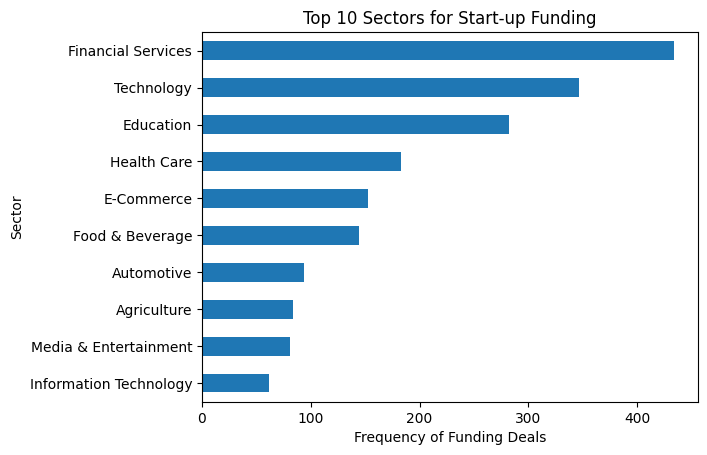

In [762]:
# Ploting bar grapgh for Sectors 
    
unique_sectors = (master_df.loc[:,'Sector']).value_counts()
print(unique_sectors)

unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Frequency of Funding Deals")
plt.ylabel("Sector")
plt.title("Top 10 Sectors for Start-up Funding")

In [771]:
funding_trend = master_df.groupby('Year')["Amount"].sum()
funding_trend = funding_trend.reset_index()
funding_trend["Amount"] = funding_trend["Amount"].apply(lambda x: math.ceil(x))
funding_trend

,Year,Amount
0,2018,6641523177
1,2019,3336433200
2,2020,90046818604
3,2021,151891755326000


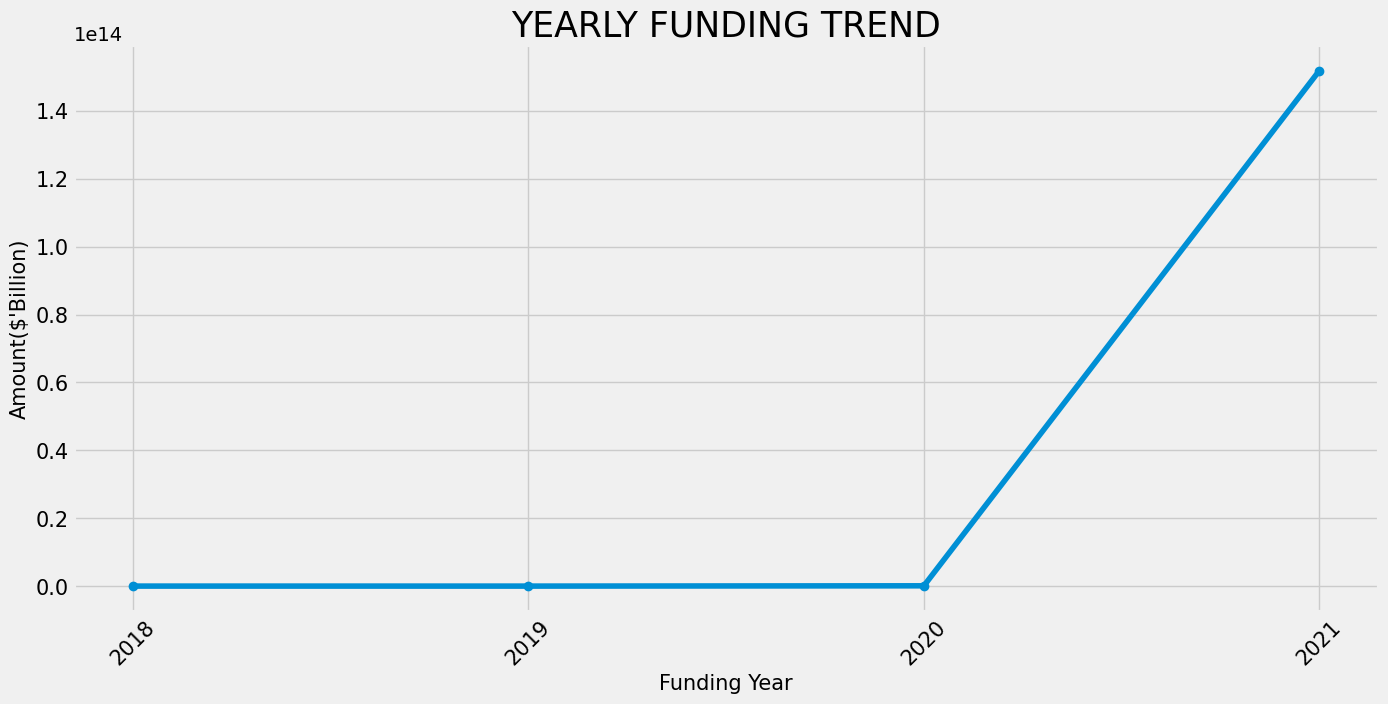

In [775]:
trend = master_df.groupby("Year")["Amount"].sum()

plt.figure(figsize=(15, 7))

plt.plot(trend.index, trend.values, marker="o")
plt.title("YEARLY FUNDING TREND", fontsize=25)
plt.xlabel("Funding Year", fontsize=15)
plt.ylabel("Amount($'Billion)", fontsize=15)
plt.xticks(trend.index, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.savefig('trend.png',dpi=300)
plt.show()

In [86]:
master_df.groupby('Sector')['Amount'].sum().reset_index().head(10).sort_values(by='Amount', ascending=False)

,Sector,Amount
4,Agriculture,1.539525e+10
8,Automotive,4.692302e+09
3,Aerospace,2.210500e+09
0,AI company,5.000000e+08
1,Advertisement,1.080000e+08
5,Artificial Intelligence,1.358072e+07
9,Aviation,3.000000e+06
2,Advisory firm,0.000000e+00
6,Arts & Crafts,0.000000e+00
7,Augmented reality,0.000000e+00


In [88]:
pd.set_option('display.float_format')

ValueError: Must provide an even number of non-keyword arguments

In [87]:
master_df[master_df["Sector"]=="AI company"]

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Founded,Founders,Investor,Year
2484,Keito,AI company,Validation,NaN,Pune,NO-CODE <> Human-assisted machine learning pla...,2016.0,Amal P S,"Rajesh Agarwal, Nandkishore Mundada",2021
2488,Wysa,AI company,Early Traction,500000000.0,Bangalore,Wysa is an AI conversational agent that has be...,2015.0,"Jo Aggarwal, Ramakant Vempati","W Health Ventures, Pi Ventures",2021


In [13]:
# Checking the info of the 2018 dataset

df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [14]:
#  Description of the 2018 dataset
df_2018.describe(include="all").transpose()

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [15]:
# Checking for NaN values in the dataset

df_2018.isna().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

In [16]:
# Checking for the number of NaN values

df_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [17]:
# Checking for duplicates in the dataset

df_2018.duplicated().sum()

1

In [18]:
# Checking for duplicated entry

df_2018[df_2018.duplicated()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [19]:
# Investigating the duplicated entry
df_2018[df_2018["Company Name"]=="TheCollegeFever"]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [20]:
# Checking the Amount column
df_2018["Amount"]

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

In [21]:
# Further cross-checking of selected columns for errors

#pd.set_option('display.max_rows', None)
#df_2018[["Company Name", "Industry", "Round/Series", "Location"]]

### Exploring the 2019 dataset

In [22]:
# Overview 2019 dataframe 

df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [23]:
# Cheking the shape of the dataset

df_2019.shape

print("The 2019  data contains " ,df_2019.shape[0], "rows and " ,df_2019.shape[1], "columns")

The 2019  data contains  89 rows and  9 columns


In [24]:
# Checking the basic info of the dataset

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [25]:
# Checking the summary description of data

df_2019.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Checking for NaN values

df_2019.isna().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor         False
Amount($)        False
Stage             True
dtype: bool

In [27]:
# Checking for the count of NaN values

df_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [28]:
# Checking for duplicated values

df_2019.duplicated().any()

False

In [29]:
# # Further cross-checking of selected columns for errors


# pd.set_option('display.max_rows', None)
# df_2019[["Company/Brand", "Sector", "Investor", "Stage"]]

### Exploring the 2020 dataset

In [30]:
# Overview of the 2020 dataframe 

df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [31]:
# Checking the shape of the data

df_2020.shape

print("The 2020  data contains " ,df_2020.shape[0], "rows and " ,df_2020.shape[1], "columns")

The 2020  data contains  1055 rows and  10 columns


In [32]:
# Checking the basic info of the dataset

df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [33]:
# Checking the summary stats of 2020  data

df_2019.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Checking for NaN values

df_2020.isna().any()

Company_Brand    False
Founded           True
HeadQuarter       True
Sector            True
What_it_does     False
Founders          True
Investor          True
Amount            True
Stage             True
column10          True
dtype: bool

In [35]:
# Checking for the count of NaN values

df_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [36]:
# Checking for duplicated values

df_2020.duplicated().any()

True

In [37]:
# Checking for counts of duplicates in dataset

df_2020.duplicated().sum()

3

In [38]:
#Checking duplicated start-ups

df_2020[df_2020.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


### Investigating the issue of duplicates

In [39]:
# Highlighting and investigating duplicated value  - "Krimanshi"

df_2020[df_2020["Company_Brand"]=="Krimanshi"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
941,Krimanshi,NaN,Jodhpur,Agritech,Sustainable system to feed animals by valorizi...,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet,20000.0,None,None


In [40]:
# Highlighting and investigating duplicated value -- Nykaa

df_2020[df_2020["Company_Brand"]=="Nykaa"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
213,Nykaa,2012.0,Mumbai,E-commerce,Nykaa is an online marketplace for different b...,Falguni Nayar,"Katrina Kaif, Steadview Capital",NaN,None,None
340,Nykaa,2012.0,Mumbai,Fashion,Cosmetics & beauty products online,Falguni Nayar,Steadview Capital,24700000.0,None,None
712,Nykaa,2012.0,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,8800000.0,None,None
813,Nykaa,2012.0,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,13137000.0,None,None


In [41]:
# Highlighting and investigating duplicated value -- Byju’s

df_2020[df_2020["Company_Brand"]=="Byju’s"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [42]:
# # Further cross-checking of selected columns for errors

# pd.set_option('display.max_rows', None)
# df_2020[["Company_Brand", "Sector", "Investor", "Stage", "HeadQuarter"]]

### Exploring the 2021 dataset

In [43]:
# Overview of the 2020 dataframe 

df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [44]:
#Checking the tail of the data
#df_2021.tail()

In [45]:
df_2021.shape

print("The 2021 data contains " ,df_2021.shape[0], "rows and " , df_2021.shape[1], "columns")

The 2021 data contains  1209 rows and  9 columns


In [46]:
# Checking the basic info of the data

df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [47]:
# Checking the summary stats of the data
df_2021.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Checking for NaN values

df_2021.isna().any()

Company_Brand    False
Founded           True
HeadQuarter       True
Sector           False
What_it_does     False
Founders          True
Investor          True
Amount            True
Stage             True
dtype: bool

In [49]:
# Checking for the count of NaN values

df_2021.isna().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [50]:
# Checking for duplicated values
df_2021.duplicated().any()

True

In [51]:
# Checking for counts of duplicates in dataset

df_2021.duplicated().sum()

19

In [52]:
# highlingting duplicated values

df_2021[df_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


### Further Investigations of duplicates in the 2021 dataset

In [53]:
# Investigating duplicated values  -  "Curefoods"

df_2021[df_2021["Company_Brand"]=="Curefoods"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None


In [54]:
# Investigating duplicated values  -  "Bewakoof"

df_2021[df_2021["Company_Brand"]=="Bewakoof"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
740,Bewakoof,2011.0,Mumbai,D2C Fashion,Society perceives Bewakoof as stupid.But what ...,Prabhkiran Singh,"IvyCap Ventures, Pratithi Investment Trust","$4,000,000",None


In [55]:
# Investigating duplicated values  -  "FanPlay"

df_2021[df_2021["Company_Brand"]=="FanPlay"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [56]:
# Investigating duplicated values  -  "Advantage Club"

df_2021[df_2021["Company_Brand"]=="Advantage Club"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
877,Advantage Club,2014.0,Gurugram,HR Tech,Advantage Club is India's largest employee eng...,Sourabh Deorah,"Y Combinator, Jetty Ventures, Earlsfield Capit...",$3300000,Pre-series A


In [57]:
# Investigating duplicated values  -  "Ruptok"

df_2021[df_2021["Company_Brand"]=="Ruptok"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
385,Ruptok,2020.0,New Delhi,FinTech,Ruptok operates as a fintech platform for gold...,"Ankur Gupta, Akshita Gupta, Yashwardhan Aeren",Wurk,"$10,000,000",None


In [58]:
# Investigating duplicated values  - "Trinkerr"

df_2021[df_2021["Company_Brand"]=="Trinkerr"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
229,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A


In [59]:
# Investigating duplicated values  -  "Zorro"

df_2021[df_2021["Company_Brand"]=="Zorro"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
230,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed


In [60]:
# Investigating duplicated values  -  "Ultraviolette"

df_2021[df_2021["Company_Brand"]=="Ultraviolette"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
231,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C


In [61]:
# Investigating duplicated values  -  "NephroPlus"

df_2021[df_2021["Company_Brand"]=="NephroPlus"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
232,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E


In [62]:
# Investigating duplicated values  -  "Unremot"

df_2021[df_2021["Company_Brand"]=="Unremot"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
233,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [63]:
# Investigating duplicated values  -  "FanAnywhere"

df_2021[df_2021["Company_Brand"]=="FanAnywhere"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
234,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed


In [64]:
# Investigating duplicated values  -  "PingoLearn"

df_2021[df_2021["Company_Brand"]=="PingoLearn"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
235,PingoLearn,2021.0,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",$200000,None
249,PingoLearn,2021.0,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",$200000,None


In [65]:
# Investigating duplicated values  -  "Spry"

df_2021[df_2021["Company_Brand"]=="Spry"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
236,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed
250,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed


In [66]:
# Investigating duplicated values  -  "Enmovil"

df_2021[df_2021["Company_Brand"]=="Enmovil"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
237,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A
251,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A


In [67]:
# Investigating duplicated values  -  "ASQI Advisors"

df_2021[df_2021["Company_Brand"]=="ASQI Advisors"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
238,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A
252,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A


In [68]:
# Investigating duplicated values  -  "Insurance Samadhan"

df_2021[df_2021["Company_Brand"]=="Insurance Samadhan"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
239,Insurance Samadhan,2018.0,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A
253,Insurance Samadhan,2018.0,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A


In [69]:
# Investigating duplicated values  -  "Evenflow Brands"
df_2021[df_2021["Company_Brand"]=="Evenflow Brands"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
240,Evenflow Brands,2020.0,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",None,$500000,None
254,Evenflow Brands,2020.0,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",None,$500000,None


In [70]:
# Investigating duplicated values  -  "MasterChow"

df_2021[df_2021["Company_Brand"]=="MasterChow"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [344]:
# Investigating duplicated values  -  "Fullife Healthcare"

df_2021[df_2021["Company_Brand"]=="Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None


#### Issues found in the 2021 Dataset 
1. There is the currency sign and commas attached to the amounts.
2. There are lots of NaN values
3. There are duplicated values - 19 in total (Curefoods, Bewakoofs, FanPlay, Advantage Club, Ruptok, Trinker, Zorro, Ultraviollette, Nephroplus, Unremot, Fansanywhere,Pingolearn, Spy, Enmovil, ASQI Advisers, Insurance Samadhan, Evenflow Brands, MasterChow, Fullife healthcare)
4. There are instances where values have been recorded under the wrong columns

## Data Cleaning and Preparation

### Cleaning the 2018 Dataset

### Cleaning the Amount column

In [345]:
df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [346]:
df_2018['Amount'].value_counts()

Amount
—                  148
1000000             24
500000              13
2000000             12
₹50,000,000          9
₹20,000,000          8
4000000              7
5000000              7
250000               6
₹40,000,000          6
₹35,000,000          5
$100,000             4
300000               4
1500000              4
₹30,000,000          4
3000000              4
1100000              4
₹250,000,000         3
₹600,000,000         3
₹2,000,000,000       3
120000               3
30000000             3
$1,000,000           3
200000               3
₹70,000,000          3
400000               3
$1,500,000           3
₹100,000,000         3
₹10,000,000          3
$100,000,000         3
150000               3
₹5,000,000           3
1300000              3
$11,000,000          3
$2,000,000           3
₹140,000,000         3
$10,000,000          2
$900,000             2
₹650,000,000         2
$50,000,000          2
$5,000,000           2
15000000             2
$6,000,000           2
₹1,2

In [347]:
# Cleaning the Amount column 2018

df_2018['Amount'] = df_2018['Amount'].apply(lambda x: str(x).replace('—','NaN').replace(',','').replace('$',''))
    

# Convert rupees to dollars (Exchange_rate = 0.0146 # Source: exchangerates.org.uk)
df_2018['Amount'] = df_2018['Amount'].apply(
    lambda x: float(str(x).replace('₹','')) * 0.0146 if '₹' in x
else x)

# Converting Amount column to Float

df_2018["Amount"] = df_2018["Amount"].astype(float)

# Display the modified DataFrame
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [348]:
df_2018['Amount'].isnull().sum()

148

### Cleaning the Round/Series column

In [349]:
# Checking unique
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [350]:
# Clean the Stage column categorize them

modified_stage = {
    'Seed': 'Seed funding',
    'Angel': 'Seed funding',
    'Venture - Series Unknown': 'Series A',
    'Debt Financing': 'Series A',
    'Grant': 'Seed funding',
    'Pre-Seed': 'Pre-Seed funding',
    'Funding Round': 'Pre-Seed funding',
    'Fresh funding': 'Pre-Seed funding',
    'Pre series A': 'Series A',
    'Post series A': 'Series A',
    'Seed fund': 'Seed funding',
    'Series B+': 'Series B',
    'Seed round': 'Seed funding',
    'Pre-seed' : 'Pre-Seed funding',
    'Seed A': 'Seed funding',
    'Pre-series A' : 'Series A',
    'Pre-series' : 'Pre-Seed funding',
    'Pre-series C' : 'Series C', 
    'Pre-series B' : 'Series B',
    'Pre- series A' : 'Series A',
    'Pre-Series B' : 'Series B',
    'Series A-1' : 'Series A', 
    'Seies A': 'Series A',
    'Seed Funding' : 'Seed funding', 
    'Pre-Seed' : 'Pre-Seed funding', 
    'Seed round': 'Seed funding' ,
    'Pre-seed Round': 'Pre-Seed funding', 
    'Pre Series A' : 'Series A',
    'Pre seed Round': 'Pre-Seed funding', 
    'Angel Round' :  'Seed funding', 
    'Pre series A1': 'Series A',
    'Pre series A' : 'Series A', 
    'Seed Round' : 'Seed funding',
    'Pre seed round' : 'Pre-Seed funding',
    'Pre series B' : 'Series B', 
    'Pre series C' : 'Series B', 
    'Seed Investment': 'Seed funding',
    'Seed+' : 'Seed funding',
    'Series A+' : 'Series A',
    'PE' : 'Private Equity',
    'Pre-series A1' : 'Series A', 
    '$300000' : 'None', 
    'Early seed' : 'Pre-Seed funding',
    '$6000000' : 'None',
    '$1000000' : 'None',
    'Series B2' : 'Series B',
    'Series E2' : 'Series E', 
    'Series D1' : 'Series D',
    'Series B3' : 'Series B',
    'Series F1' : 'Series F',
    'Series A2' : 'Series A',
    '$1200000': 'None',
    'Series F2':'Series F'
}

In [351]:
# Replace with the modified stages

df_2018.replace({'Round/Series': modified_stage}, inplace=True)

In [352]:
# Confirm changes
df_2018['Round/Series'].unique()

array(['Seed funding', 'Series A', 'Series B', 'Pre-Seed funding',
       'Private Equity', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance'], dtype=object)

In [353]:
# Replace the web address with NaN
df_2018['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 
                         np.NaN, inplace=True)

In [354]:
# Confirm changes
df_2018['Round/Series'].value_counts()

Round/Series
Seed funding             321
Series A                 123
Series B                  20
Series C                  16
Private Equity            10
Corporate Round            8
Pre-Seed funding           7
Series E                   5
Series D                   3
Secondary Market           3
Post-IPO Equity            3
Post-IPO Debt              2
Undisclosed                2
Series H                   1
Non-equity Assistance      1
Name: count, dtype: int64

In [355]:
# Check for missing values in the stage column
df_2018['Round/Series'].isnull().sum()

1

### Cleaning the Industry column

In [356]:
df_2018['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [357]:
# We want to simplify the industry column
# Split values with a comma delimiter, select only the first element from the resulting list of substrings
# remove single quotes, since it is a string

df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0].str.replace("'", "", regex=True)

df_2018['Industry'].sort_values()

139                           3D Printing
446                            Accounting
422                            Accounting
17                             Accounting
366                           Advertising
123                           Advertising
333                           Advertising
81                            Advertising
421                             Aerospace
87                              Aerospace
127                                AgTech
432                           Agriculture
402                           Agriculture
436                           Agriculture
382                           Agriculture
25                            Agriculture
302                           Agriculture
1                             Agriculture
293                           Agriculture
20                     Air Transportation
323                  Alternative Medicine
471                             Analytics
266                             Analytics
241                             An

In [358]:
modified_sector = {
    '3D Printing': 'IT & Technology',
    'Accounting': 'Financial Services',
    'Advertising': 'Media & Entertainment',
    'Aerospace': 'Transportation & Logistics',
    'AgTech': 'Agriculture',
    'Agriculture': 'Agriculture',
    'Air Transportation': 'Transportation & Logistics',
    'Alternative Medicine': 'Healthcare',
    'Analytics': 'IT & Technology',
    'Android': 'IT & Technology',
    'Apps': 'IT & Technology',
    'Artificial Intelligence': 'IT & Technology',
    'Audio': 'Media & Entertainment',
    'Automotive': 'Transportation & Logistics',
    'Autonomous Vehicles': 'Transportation & Logistics',
    'B2B': 'IT & Technology',
    'Banking': 'Financial Services',
    'Basketball': 'Sports',
    'Battery': 'IT & Technology',
    'Beauty': 'Consumer Goods',
    'Big Data': 'IT & Technology',
    'Biopharma': 'Healthcare',
    'Biotechnology': 'Healthcare',
    'Blockchain': 'IT & Technology',
    'Brand Marketing': 'Media & Entertainment',
    'Broadcasting': 'Media & Entertainment',
    'Business Development': 'Others',
    'Business Intelligence': 'IT & Technology',
    'Business Travel': 'Hospitality',
    'Career Planning': 'Education',
    'Catering': 'Hospitality',
    'Child Care': 'Healthcare',
    'Children': 'Consumer Goods',
    'Classifieds': 'Media & Entertainment',
    'Clean Energy': 'IT & Technology',
    'CleanTech': 'IT & Technology',
    'Cloud Computing': 'IT & Technology',
    'Cloud Infrastructure': 'IT & Technology',
    'Collaboration': 'IT & Technology',
    'Commercial': 'Real Estate',
    'Commercial Real Estate': 'Real Estate',
    'Communities': 'IT & Technology',
    'Computer': 'IT & Technology',
    'Consulting': 'Business Services',
    'Consumer': 'Consumer Goods',
    'Consumer Applications': 'Consumer Goods',
    'Consumer Electronics': 'Consumer Goods',
    'Consumer Goods': 'Consumer Goods',
    'Consumer Lending': 'Financial Services',
    'Continuing Education': 'Education',
    'Cooking': 'Consumer Goods',
    'Cosmetics': 'Consumer Goods',
    'Creative Agency': 'Media & Entertainment',
    'Credit': 'Financial Services',
    'Credit Cards': 'Financial Services',
    'Crowdfunding': 'Financial Services',
    'Crowdsourcing': 'IT & Technology',
    'Cryptocurrency': 'Financial Services',
    'Customer Service': 'Business Services',
    'Dating': 'Media & Entertainment',
    'Delivery': 'Transportation & Logistics',
    'Delivery Service': 'Transportation & Logistics',
    'Dental': 'Healthcare',
    'Dietary Supplements': 'Healthcare',
    'Digital Entertainment': 'Media & Entertainment',
    'Digital Marketing': 'Media & Entertainment',
    'Digital Media': 'Media & Entertainment',
    'E-Commerce': 'Retail',
    'E-Commerce Platforms': 'Retail',
    'E-Learning': 'Education',
    'EdTech': 'Education',
    'Education': 'Education',
    'Electric Vehicle': 'Transportation & Logistics',
    'Embedded Systems': 'IT & Technology',
    'Energy': 'IT & Technology',
    'Enterprise Resource Planning (ERP)': 'IT & Technology',
    'Enterprise Software': 'IT & Technology',
    'Environmental Consulting': 'IT & Technology',
    'Events': 'Hospitality',
    'Eyewear': 'Consumer Goods',
    'Facilities Support Services': 'Business Services',
    'Fantasy Sports': 'Sports',
    'Farming': 'Agriculture',
    'Fashion': 'Consumer Goods',
    'File Sharing': 'IT & Technology',
    'FinTech': 'Financial Services',
    'Finance': 'Financial Services',
    'Financial Services': 'Financial Services',
    'Fitness': 'Healthcare',
    'Food Delivery': 'Transportation & Logistics',
    'Food Processing': 'Manufacturing',
    'Food and Beverage': 'Consumer Goods',
    'Fraud Detection': 'IT & Technology',
    'Funding Platform': 'Financial Services',
    'Gaming': 'Media & Entertainment',
    'Government': 'Others',
    'Health Care': 'Healthcare',
    'Health Diagnostics': 'Healthcare',
    'Health Insurance': 'Healthcare',
    'Home Decor': 'Consumer Goods',
    'Hospital': 'Healthcare',
    'Hospitality': 'Hospitality',
    'Human Resources': 'Business Services',
    'Industrial': 'Manufacturing',
    'Industrial Automation': 'Manufacturing',
    'Information Services': 'IT & Technology',
    'Information Technology': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Internet': 'IT & Technology',
    'Internet of Things': 'IT & Technology',
    'Last Mile Transportation': 'Transportation & Logistics',
    'Logistics': 'Transportation & Logistics',
    'Manufacturing': 'Manufacturing',
    'Market Research': 'IT & Technology',
    'Marketing': 'Media & Entertainment',
    'Marketplace': 'Retail',
    'Media and Entertainment': 'Media & Entertainment',
    'Medical': 'Healthcare',
    'Medical Device': 'Healthcare',
    'Mobile': 'IT & Technology',
    'Mobile Payments': 'Financial Services',
    'Music': 'Media & Entertainment',
    'Music Streaming': 'Media & Entertainment',
    'Nanotechnology': 'IT & Technology',
    'News': 'Media & Entertainment',
    'Online Games': 'Media & Entertainment',
    'Online Portals': 'IT & Technology',
    'Packaging Services': 'Manufacturing',
    'Reading Apps': 'Media & Entertainment',
    'Renewable Energy': 'IT & Technology',
    'Rental': 'Retail',
    'Retail': 'Retail',
    'Search Engine': 'IT & Technology',
    'Smart Cities': 'IT & Technology',
    'Social Media': 'Media & Entertainment',
    'Software': 'IT & Technology',
    'Sports': 'Sports',
    'Tourism': 'Hospitality',
    'Trading Platform': 'Financial Services',
    'Training': 'Education',
    'Transportation': 'Transportation & Logistics',
    'Travel': 'Hospitality',
    'Veterinary': 'Healthcare',
    'Wealth Management': 'Financial Services',
    'Wedding': 'Hospitality',
    'Wellness': 'Healthcare',
    'eSports': 'Media & Entertainment',
    '—': 'Unknown'

}

In [359]:
# Replace with the modified stages

df_2018.replace({'Industry': modified_sector}, inplace=True)



In [360]:
# Confirm changes
df_2018['Industry'].unique()

array(['Media & Entertainment', 'Agriculture', 'Financial Services',
       'Retail', 'IT & Technology', 'Transportation & Logistics',
       'Manufacturing', 'Consumer Goods', 'Education', 'Healthcare',
       'Hospitality', 'Unknown', 'Sports', 'Business Services', 'Others',
       'Real Estate'], dtype=object)

In [361]:
df_2018['Industry'].value_counts()

Industry
IT & Technology               132
Financial Services             78
Healthcare                     55
Consumer Goods                 44
Transportation & Logistics     41
Media & Entertainment          34
Education                      33
Unknown                        30
Retail                         28
Hospitality                    14
Agriculture                    10
Business Services              10
Manufacturing                   9
Sports                          4
Others                          2
Real Estate                     2
Name: count, dtype: int64

### Cleaning the Location column

In [362]:
# Checking for unique 
df_2018['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [363]:
df_2018['Location'].value_counts()

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

In [364]:
# Replace with the modified location

#df_2018.replace({'Location': modified_location}, inplace=True)

In [365]:
# Removing states, region and country
df_2018["Location"]=df_2018['Location'].str.split(',').str[0]

In [366]:
# Confirm result
df_2018['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [485]:
# Modified location mapping
modified_location ={
    'Bengaluru': 'Bangalore',
    'Delhi': 'New Delhi',
    'Bangalore City' : 'Bangalore',
    #'Gurgaon' : 'Gurugram',
    'Haryana': 'Chandigarh',
    'Uttar Pradesh' : 'Noida',
    'Uttar pradesh' : 'Noida',
    'Tamil Nadu': 'Chennai',
    'Faridabad, Haryana': 'Faridabad',
    'Computer Games': 'Undisclosed',
    'Telangana': 'Hyderabad',  # 2019
    'Dhingsara, Haryana': 'Chandigarh',
    'The nilgiris': 'Chennai',
    'Santra': 'Bhopal',
    'India': 'New delhi',
    'Gurugram\\t#ref!': 'Gurgaon',
    '"Gurugram\t#ref!"': 'Gurgaon',
    'Banglore': 'Bangalore',
    'Singapore': 'Overseas',
    'Frisco, Texas, United States': 'Overseas',
    'California': 'Overseas',
    'New York, United States': 'Overseas',
    'San Francisco, California, United States': 'Overseas',
    'San Francisco, United States': 'Overseas',
    'San Ramon, California': 'Overseas',
    'Paris, Ile-de-France, France': 'Overseas',
    'Plano, Texas, United States': 'Overseas',
    'Sydney': 'Overseas',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'Overseas',
    'Bangaldesh': 'Overseas',
    'London, England, United Kingdom': 'Overseas',
    'Sydney, New South Wales, Australia': 'Overseas',
    'Milano, Lombardia, Italy': 'Overseas',
    'Palmwoods, Queensland, Australia': 'Overseas',
    'France': 'Overseas',
    'San Francisco Bay Area, West Coast, Western US': 'Overseas',
    'Tangerang, Jawa Barat, Indonesia': 'Overseas',
    'Berlin': 'Overseas',
    'Seattle': 'Overseas',
    'Riyadh': 'Overseas',
    'Seoul': 'Overseas',
    'New York': 'Overseas',
    'Bangkok': 'Overseas',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Overseas',
    'Shanghai, China': 'Overseas',
    'Jiaxing, Zhejiang, China': 'Overseas',
    'Irvine, California, United States': 'Overseas',
    'San Franciscao' : 'Overseas',
    'San Francisco': 'Overseas',
    'Jaipur, Rajastan': 'Jaipur',
    'Rajastan': "Jaipur",
    'Tumkur, Karnataka': 'Tumkur',
    'Samastipur, Bihar': 'Samastipur',
    #'None' : 'Undisclosed',
    'Tumkur, Karnataka' : 'Tumkur',
    'Tirunelveli, Tamilnadu': 'Tirunelveli',
    'Trivandrum, Kerala, India': 'Trivandrum',
    'Manchester': 'Overseas',
    'Mountain View, CA' : 'Overseas',
    'London' : 'Overseas',
    'Information Technology & Services': 'Undisclosed',
    'The Nilgiris' :'Chennai',
    'Beijing' : 'Overseas'
  
    

    

}

In [368]:
# Replace with the modified location

df_2018.replace({'Location': modified_location}, inplace=True)

In [369]:
# Confirm changes
df_2018['Location'].value_counts()

Location
Bangalore     162
Mumbai         94
New Delhi      67
Gurgaon        52
Pune           20
Chennai        19
Hyderabad      18
Noida          16
Chandigarh     12
Jaipur          9
Ahmedabad       6
Kolkata         6
Indore          4
New delhi       4
Kormangala      3
Kochi           2
Ghaziabad       2
Thane           2
Bhopal          2
Ernakulam       1
Kalpakkam       1
Coimbatore      1
Guntur          1
Powai           1
Worli           1
Alleppey        1
Mylapore        1
Guindy          1
Andheri         1
Anand           1
Trivandrum      1
Kannur          1
Alwar           1
Margão          1
Belgaum         1
Kota            1
Faridabad       1
Cochin          1
Azadpur         1
Kanpur          1
Jodhpur         1
Mohali          1
Hubli           1
Kalkaji         1
Lucknow         1
Name: count, dtype: int64

In [370]:

# Add a year column
df_2018['Year'] = 2018

In [371]:
# Rename columns to match other datasets
df_2018 = df_2018.rename(columns={'Company Name': 'Company_Brand','Industry': 'Sector',
                                  'Round/Series': 'Stage', 'Location': 'HeadQuarter', 'About Company': 'What_it_does'})

In [372]:
#2018 Dataframe after cleaning
df_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Year
0,TheCollegeFever,Media & Entertainment,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed funding,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Financial Services,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,Retail,Seed funding,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


### Cleaning the 2019 Dataset

### Cleaning the Amount column

In [373]:
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [374]:
# Cleaning amounts column for 2019
df_2019['Amount($)']=df_2019['Amount($)'].apply(lambda x:str(x).replace('$','').replace(',','').replace('Undisclosed','0'))
df_2019['Amount($)'] = df_2019['Amount($)'].replace('0', np.nan)

# Converting Amount column to Float
df_2019['Amount($)'] = df_2019['Amount($)'].astype(float)

In [375]:
# Confirm changes in the amount column
df_2019['Amount($)']

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
5             NaN
6             NaN
7       1000000.0
8      20000000.0
9     275000000.0
10            NaN
11     22000000.0
12      5000000.0
13       140500.0
14            NaN
15      5000000.0
16    540000000.0
17     15000000.0
18       182700.0
19            NaN
20      5000000.0
21     12000000.0
22     11000000.0
23            NaN
24     15500000.0
25      1500000.0
26      5500000.0
27      5000000.0
28     12000000.0
29      2500000.0
30     30000000.0
31       140000.0
32            NaN
33    230000000.0
34     20000000.0
35     49400000.0
36     32000000.0
37     26000000.0
38       150000.0
39       400000.0
40      2000000.0
41    100000000.0
42      8000000.0
43      1500000.0
44       100000.0
45            NaN
46     50000000.0
47      6000000.0
48    120000000.0
49      4000000.0
50     30000000.0
51      4000000.0
52      1500000.0
53      1000000.0
54            NaN
55        

### Cleaning the Stage  column

In [376]:
df_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [377]:
# Replace with the modified stages

df_2019.replace({'Stage': modified_stage}, inplace=True)

In [378]:
# Confirm changes
df_2019['Stage'].unique()

array([nan, 'Series C', 'Pre-Seed funding', 'Series D', 'Series A',
       'Series G', 'Series B', 'Seed funding', 'Series E', 'Series F'],
      dtype=object)

In [ ]:
### Cleaning HeadQuarter column

In [379]:
# Checking for unique
df_2019['HeadQuarter'].unique()


array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [381]:
# Replace with the modified location

df_2019.replace({'HeadQuarter': modified_location}, inplace=True)

In [382]:
# Confirm changes 
df_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Hyderabad', 'Pune', 'Bangalore',
       'Noida', 'New Delhi', 'Ahmedabad', 'Gurugram', 'Chandigarh',
       'Jaipur', 'Surat', 'Rajasthan'], dtype=object)

### Cleaning Sector column

In [383]:
df_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [ ]:

# Add a year column
df_2019['Year'] = 2019

In [ ]:
# Rename columns to match other tables
df_2018 = df_2018.rename(columns={'Company/Brand': 'Company_Brand',
                                   'What it does': 'What_it_does', 'Amount($)': 'Amount'})

In [ ]:
df_2019.head()

In [ ]:
df_2020.head()

In [ ]:
df_2021.head()

### Cleaning 2020 dataset

### Cleaning Amount Column

In [384]:
# Checking Amount column for unique values 
df_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [385]:
# Cleaning Amount column for 2020

df_2020['Amount']=df_2020['Amount'].apply(lambda x:str(x).replace('$','').
                                                replace(',','').replace('Undisclosed','0').
                                                replace('nan','0').replace('Undislosed','0').replace('Undiclsosed','0'))
df_2020['Amount'] = df_2020['Amount'].replace('0', np.nan)

### Cleaning the Stage  column

In [386]:
df_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [387]:
# Replace with the modified stages

df_2020.replace({'Stage': modified_stage}, inplace=True)

In [388]:
# Confirm changes
df_2020['Stage'].unique()

array([None, 'Pre-Seed funding', 'Seed funding', 'Series A', 'Series C',
       'Series B', 'Debt', 'Series E', 'Bridge', 'Series D', 'Series F',
       'Edge', 'Series H', 'Seed Round & Series A', 'Bridge Round',
       'Mid series', 'Series C, D'], dtype=object)

### Cleaning HeadQuarter

In [389]:
# Checking for unique
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [390]:
df_2020['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                                                   317
Mumbai                                                      165
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
Pune                                                         36
New Delhi                                                    36
Noida                                                        32
Hyderabad                                                    25
Gurgaon                                                      21
Ahmedabad                                                    11
Kolkata                                                      11
Haryana                                                      10
Indore                                                        8
Jaipur                                                        6
Thane                       

In [401]:
# Replace with the modified location

df_2020.replace({'HeadQuarter': modified_location}, inplace=True)

In [402]:
# Confirm changes 
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', None, 'Overseas',
       'Gurugram', 'Gujarat', 'Chandigarh', 'Kerala', 'Jodhpur', 'Patna',
       'Trivandrum', 'Cochin', 'Samastipur', 'Tumkur', 'Kochi',
       'Ludhiana', 'Dehradun', 'Kanpur', 'Warangal', 'Hyderebad',
       'Odisha', 'Bihar', 'Goa', 'Bhopal', 'Coimbatore'], dtype=object)

### Cleaning Sctor column

In [ ]:
# Add a year column
df_2020['Year'] = 2020

### Cleaning 2021 dataset

### Correction of columns with wrong entries

### Important notice for corrections
Theses errors were noticed in the Data Understanding phase

##### Label 98, 111 (FanPlay)
No Location

Amount 1200000 was recorded under Stage

Investor(Upstarks) was recorded under Amount

##### Label 241, 255 (MasterChow)
Sector(Food & Beverages) was recorded under Location

Location (Hauz Khas) was recorded under Sector 

##### Label 242, 256 (Fullife Healthcare)
Amount of 22000000 was recorded under Investor

Investor (Morgan Stanley, Private Equity Asia) was recorded under Founder

Stage(Series C) was recorded under Amount

Sector (Pharmaceuticals) was recorded under Location

There was no location recorded

##### Label 1100
Sector - Online Media

##### Label 1176(Peak)
Location  -  Manchester

Sector  - Information Technology

In [465]:
# LABEL 98, 111(FANPLAY)
df_2021.loc[(98, 111), "Amount"] = "$1200000"
df_2021.loc[(98, 111), "Stage"] = "Undisclosed"
df_2021.loc[(98, 111), "Investor"] = "Upsparks"
df_2021.loc[(98, 111), "HeadQuarter"] = "Undisclosed"

In [466]:
# LABEL 241, 255(MASTERCHOW)
df_2021.loc[(241, 255), "HeadQuarter"] = "Hauz Khas"
df_2021.loc[(241, 255), "Sector"] = "Food & Beverages"

In [467]:
# LABEL 257(MoEVing)
df_2021.loc[257, "Amount"] = "$5000000"
df_2021.loc[257, "HeadQuarter"] = "Gurugram"
df_2021.loc[257, "Sector"] = "Electronic Vehicle"
df_2021.loc[257, "Stage"] = "Seed"
df_2021.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

In [468]:
# LABEL 242, 256(FULLIFE HEALTHCARE)
df_2021.loc[(242, 256), "Amount"] = "$22000000"
df_2021.loc[(242, 256), "Investor"] = "Morgan Stanley Private Equity Asia"
df_2021.loc[(242, 256), "Stage"] = "Series C"
df_2021.loc[(242, 256), "HeadQuarter"] = "Mumbai"
df_2021.loc[(242, 256), "Sector"] = "Pharmaceuticals"
df_2021.loc[(242, 256), "Founders"] = "Varun Khanna"
df_2021.loc[(242, 256), "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

In [469]:
# LABEL 538 (LITTLE LEAP)
df_2021.loc[538, "Amount"] = "$300000"
df_2021.loc[538, "Investor"] = "ah! Ventures"
df_2021.loc[538, "Stage"] = "Undisclosed"
df_2021.loc[538, "Founders"] = "Vishal Gupta"

In [470]:
# LABEL 545 (ADMITKARD)
df_2021.loc[545, "Amount"] = "$1000000"
df_2021.loc[545, "Investor"] = "Unknown"
df_2021.loc[545, "Stage"] = "Pre-series A"
df_2021.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

In [471]:
# LABEL 551 (BHyve)
df_2021.loc[551, "Amount"] = "$300000"
df_2021.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
df_2021.loc[551, "Stage"] = "Undisclosed"
df_2021.loc[551, "Sector"] = "HR"


In [472]:
# LABEL 674 (MYRE Capital)
df_2021.loc[674, "Amount"] = "$6000000"
df_2021.loc[674, "Stage"] = "Undisclosed"

In [473]:
# LABEL 677 (Saarthi Pedagogy)
df_2021.loc[677, "Amount"] = "$1000000"
df_2021.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
df_2021.loc[677, "Stage"] = "Undisclosed"

In [474]:
# LABEL 1100(STOCHCAST)
df_2021.loc[1100, "Investor"] = "Undisclosed"
df_2021.loc[1100, "HeadQuarter"] = "Undisclosed"
df_2021.loc[1100, "Sector"] = "Online Media"

In [475]:
# LABEL 1148 (Godamwale)
df_2021.loc[1148, "Amount"] = "1000000"
df_2021.loc[1148, "Investor"] = "Undisclosed"
df_2021.loc[1148, "Stage"] = "Seed"


In [476]:
# LABEL 1176(PEAK)
df_2021.loc[1176, "Sector"] = "Information Technology & Services"
df_2021.loc[1100, "HeadQuarter"] = "Manchester"

### Cleaning Amount column

In [784]:
df_2021['Amount'].value_counts(ascending=True)

Amount
102000000.0     1
36000000.0      1
67000000.0      1
10200000.0      1
450000.0        1
               ..
5000000.0      40
3000000.0      41
100000000.0    44
2000000.0      57
1000000.0      58
Name: count, Length: 245, dtype: int64

In [478]:
# Cleaning amounts column for 2021

df_2021['Amount']=df_2021['Amount'].apply(lambda x:str(x).replace('$','').
                                                replace(',' , '0').replace('Undisclosed','0').
                                                replace('None','0').replace('$Undisclosed','0').replace('Upsparks','0').replace('Series C','0').replace('Seed','0').
                                                replace('$undisclosed', '0').
                                                replace('ah! Ventures','0').
                                                replace('Pre-series A','0').
                                                replace('JITO Angel Network LetsVenture','0').
                                                replace('ITO Angel Network LetsVenture','0').replace('undisclosed','0').
                                                replace('ITO Angel Network0 LetsVenture', '0').replace('nan', '0').replace('J0', '0')
                                                )

In [479]:
df_2021['Amount'] = df_2021['Amount'].replace('0', np.nan) 

df_2021['Amount'] = pd.to_numeric(df_2021['Amount'], downcast='float') # Convert Amount($) column from String to Float 

In [439]:
# Confirm changes
df_2021['Amount'].value_counts()


Amount
1.000000e+06    61
2.000000e+06    57
1.000000e+08    44
3.000000e+06    41
5.000000e+06    41
1.000000e+07    28
4.000000e+06    26
5.000000e+05    25
2.000000e+08    25
2.000000e+05    20
3.000000e+05    18
6.000000e+06    18
3.000000e+08    18
4.000000e+05    18
7.000000e+06    16
2.000000e+07    15
1.000000e+09    15
1.200000e+06    14
8.000000e+06    14
1.500000e+06    13
5.000000e+08    13
3.000000e+07    13
7.000000e+05    12
1.500000e+09    11
6.000000e+08    11
5.000000e+07    10
6.000000e+05    10
4.000000e+08    10
1.200000e+07     9
2.500000e+06     9
1.050000e+08     9
1.000000e+05     9
3.500000e+06     9
3.000000e+09     8
4.000000e+07     8
4.500000e+06     6
1.080000e+08     6
5.500000e+06     6
4.000000e+09     6
2.500000e+07     6
1.300000e+06     6
1.500000e+05     6
1.500000e+07     6
2.000000e+09     5
1.300000e+07     5
5.000000e+09     5
1.500000e+08     5
2.400000e+07     5
6.000000e+07     5
1.700000e+06     5
8.000000e+05     5
9.000000e+06     5
2.300

### Cleaning Stage column

In [480]:
df_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [481]:
# Replace with the modified stages

df_2021.replace({'Stage': modified_stage}, inplace=True)

In [482]:
# Confirm changes
df_2021['Stage'].unique()

array(['Series A', None, 'Series D', 'Series C', 'Seed funding',
       'Series B', 'Series E', 'Pre-Seed funding', 'Debt', 'Undisclosed',
       'Bridge', 'Series F', 'Series G', 'Series H', 'Private Equity',
       'Series I'], dtype=object)

### Cleaning HeadQuarter

In [1]:
# Checking for unique
df_2021['HeadQuarter'].unique()

NameError: name 'df_2021' is not defined

In [486]:
# Replace with the modified location

df_2021.replace({'HeadQuarter': modified_location}, inplace=True)

In [487]:
# Confirm changes 
df_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad', 'Gujarat', 'Pune', 'Thane', 'Undisclosed', 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Hauz Khas',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Indore', 'Powai', 'Ghaziabad',
       'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
       'Silvassa', 'Thiruvananthapuram', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'Overseas', 'Bhopal',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London',
       'Information Technology & Services', 'The Nilgiris', 'Gandhinagar'],
      dtype=object)

### Cleaning Sector column

In [ ]:
# Add a year column
df_2021['Year'] = 2021